In [1]:
# Single Cell RNA-Seq Analysis

# Install scanpy
# !pip install scanpy

# Load packages
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Set the directory path
directory_path = '/Users/christophertarkaa/Desktop/Bioinformatics/scRNA-Seq analysis'

# Change the current working directory
os.chdir(directory_path)

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [4]:
# Read in counts matrix
adata_matrix = sc.read_text("GSE182434_raw_count_matrix.txt")
# Read in cell annotation data
cell_annotations = pd.read_csv('GSE182434_cell_annotation.txt', delimiter='\t')


In [5]:
print(adata_matrix)

AnnData object with n_obs × n_vars = 49632 × 28416


In [6]:
# Transpose data
adata = adata_matrix.transpose()


In [7]:
adata

AnnData object with n_obs × n_vars = 28416 × 49632

In [8]:
# Combine cell annotations data with adata into a singular oblect
adata.obs = cell_annotations
print(adata.obs)
adata.obs

                               ID   Patient     Sample     CellType  \
0      AAACCTGAGTTAAGTG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
1      AAACCTGCATGTAAGA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
2      AAACCTGTCGCGCCAA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
3      AAACGGGAGACTTTCG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
4      AAACGGGCATGTTGAC_DLBCL002B  DLBCL002  DLBCL002B      B cells   
...                           ...       ...        ...          ...   
28411       TTTGTCACATGGGAAC_T2NB        T2       T2NB          TFH   
28412       TTTGTCACATGGTCTA_T2NB        T2       T2NB  T cells CD4   
28413       TTTGTCAGTAAGTTCC_T2NB        T2       T2NB          TFH   
28414       TTTGTCAGTGACTCAT_T2NB        T2       T2NB  T cells CD4   
28415       TTTGTCATCTGATTCT_T2NB        T2       T2NB        Tregs   

      TumorNormal  COO  Tissue  
0          Normal  ABC   DLBCL  
1           Tumor  ABC   DLBCL  
2           Tumor  ABC   DLBCL  
3           Tum

ID   Patient     Sample     CellType  \
0      AAACCTGAGTTAAGTG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
1      AAACCTGCATGTAAGA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
2      AAACCTGTCGCGCCAA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
3      AAACGGGAGACTTTCG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
4      AAACGGGCATGTTGAC_DLBCL002B  DLBCL002  DLBCL002B      B cells   
...                           ...       ...        ...          ...   
28411       TTTGTCACATGGGAAC_T2NB        T2       T2NB          TFH   
28412       TTTGTCACATGGTCTA_T2NB        T2       T2NB  T cells CD4   
28413       TTTGTCAGTAAGTTCC_T2NB        T2       T2NB          TFH   
28414       TTTGTCAGTGACTCAT_T2NB        T2       T2NB  T cells CD4   
28415       TTTGTCATCTGATTCT_T2NB        T2       T2NB        Tregs   

      TumorNormal  COO  Tissue  
0          Normal  ABC   DLBCL  
1           Tumor  ABC   DLBCL  
2           Tumor  ABC   DLBCL  
3           Tumor  ABC   DLBCL  
4           Tumor  ABC   DLBCL  
...           ...  ...     ...  
28411      Normal  NaN  Tonsil  
28412      Normal  NaN  Tonsil  
28413      Normal  NaN  Tonsil  
28414      Normal  NaN  Tonsil  
28415      Normal  NaN  Tonsil  

[28416 rows x 7 columns]

In [9]:
# Inspection of newly created AnnData object
# List the cell names
adata.obs
# List the gene names
adata.var
# Create a shallow dataframe (No changes to the original dataframe)
adata.to_df()

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  AL627309.2  \
0              0.0      0.0    0.0         0.0         0.0         0.0   
1              0.0      0.0    0.0         0.0         0.0         0.0   
2              0.0      0.0    0.0         0.0         0.0         0.0   
3              0.0      0.0    0.0         0.0         0.0         0.0   
4              0.0      0.0    0.0         0.0         0.0         0.0   
...            ...      ...    ...         ...         ...         ...   
28411          0.0      0.0    0.0         0.0         0.0         0.0   
28412          0.0      0.0    0.0         0.0         0.0         0.0   
28413          0.0      0.0    0.0         0.0         0.0         0.0   
28414          0.0      0.0    0.0         0.0         0.0         0.0   
28415          0.0      0.0    0.0         0.0         0.0         0.0   

       AL627309.5  AL627309.4  AP006222.2  AL732372.1  ...  AP001469.5  \
0             0.0         0.0         0.0         0.0  ...         0.0   
1             0.0         0.0         0.0         0.0  ...         0.0   
2             0.0         0.0         0.0         0.0  ...         0.0   
3             0.0         0.0         0.0         0.0  ...         0.0   
4             0.0         0.0         0.0         0.0  ...         0.0   
...           ...         ...         ...         ...  ...         ...   
28411         0.0         0.0         0.0         0.0  ...         0.0   
28412         0.0         0.0         0.0         0.0  ...         0.0   
28413         0.0         0.0         0.0         0.0  ...         0.0   
28414         0.0         0.0         0.0         0.0  ...         0.0   
28415         0.0         0.0         0.0         0.0  ...         0.0   

       AP001469.7  AP001469.9  AC136352.5  AC136352.4  AC171558.2  BX004987.4  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
28411         0.0         0.0         0.0         0.0         0.0         0.0   
28412         0.0         0.0         0.0         0.0         0.0         0.0   
28413         0.0         0.0         0.0         0.0         0.0         0.0   
28414         0.0         0.0         0.0         0.0         0.0         0.0   
28415         0.0         0.0         0.0         0.0         0.0         0.0   

       AC145212.4  AC145212.2  FAM231B  
0             0.0         0.0      0.0  
1             0.0         0.0      0.0  
2             0.0         0.0      0.0  
3             0.0         0.0      0.0  
4             0.0         0.0      0.0  
...           ...         ...      ...  
28411         0.0         0.0      0.0  
28412         0.0         0.0      0.0  
28413         0.0         0.0      0.0  
28414         0.0         0.0      0.0  
28415         0.0         0.0      0.0  

[28416 rows x 49632 columns]

normalizing counts per cell
    finished (0:00:09)


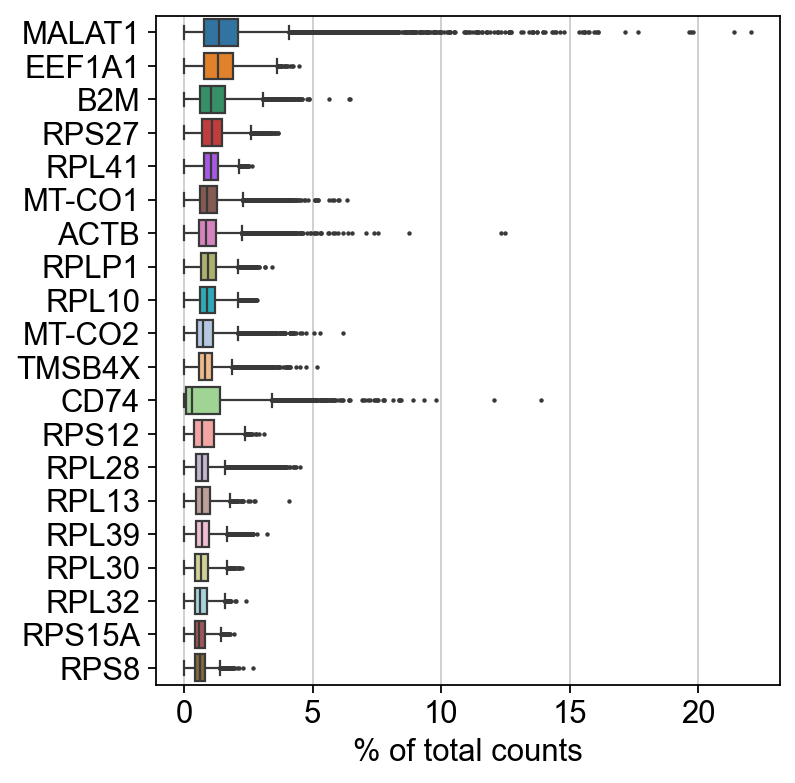

In [10]:
# Quality control of AnnData object

# The n_top genes with the highest mean fraction over all cells
sc.pl.highest_expr_genes(adata, n_top=20)

In [11]:
# Filtering
# Filter cells with less than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

# Filter genes that are expressed in less than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

/opt/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


filtered out 23376 genes that are detected in less than 3 cells


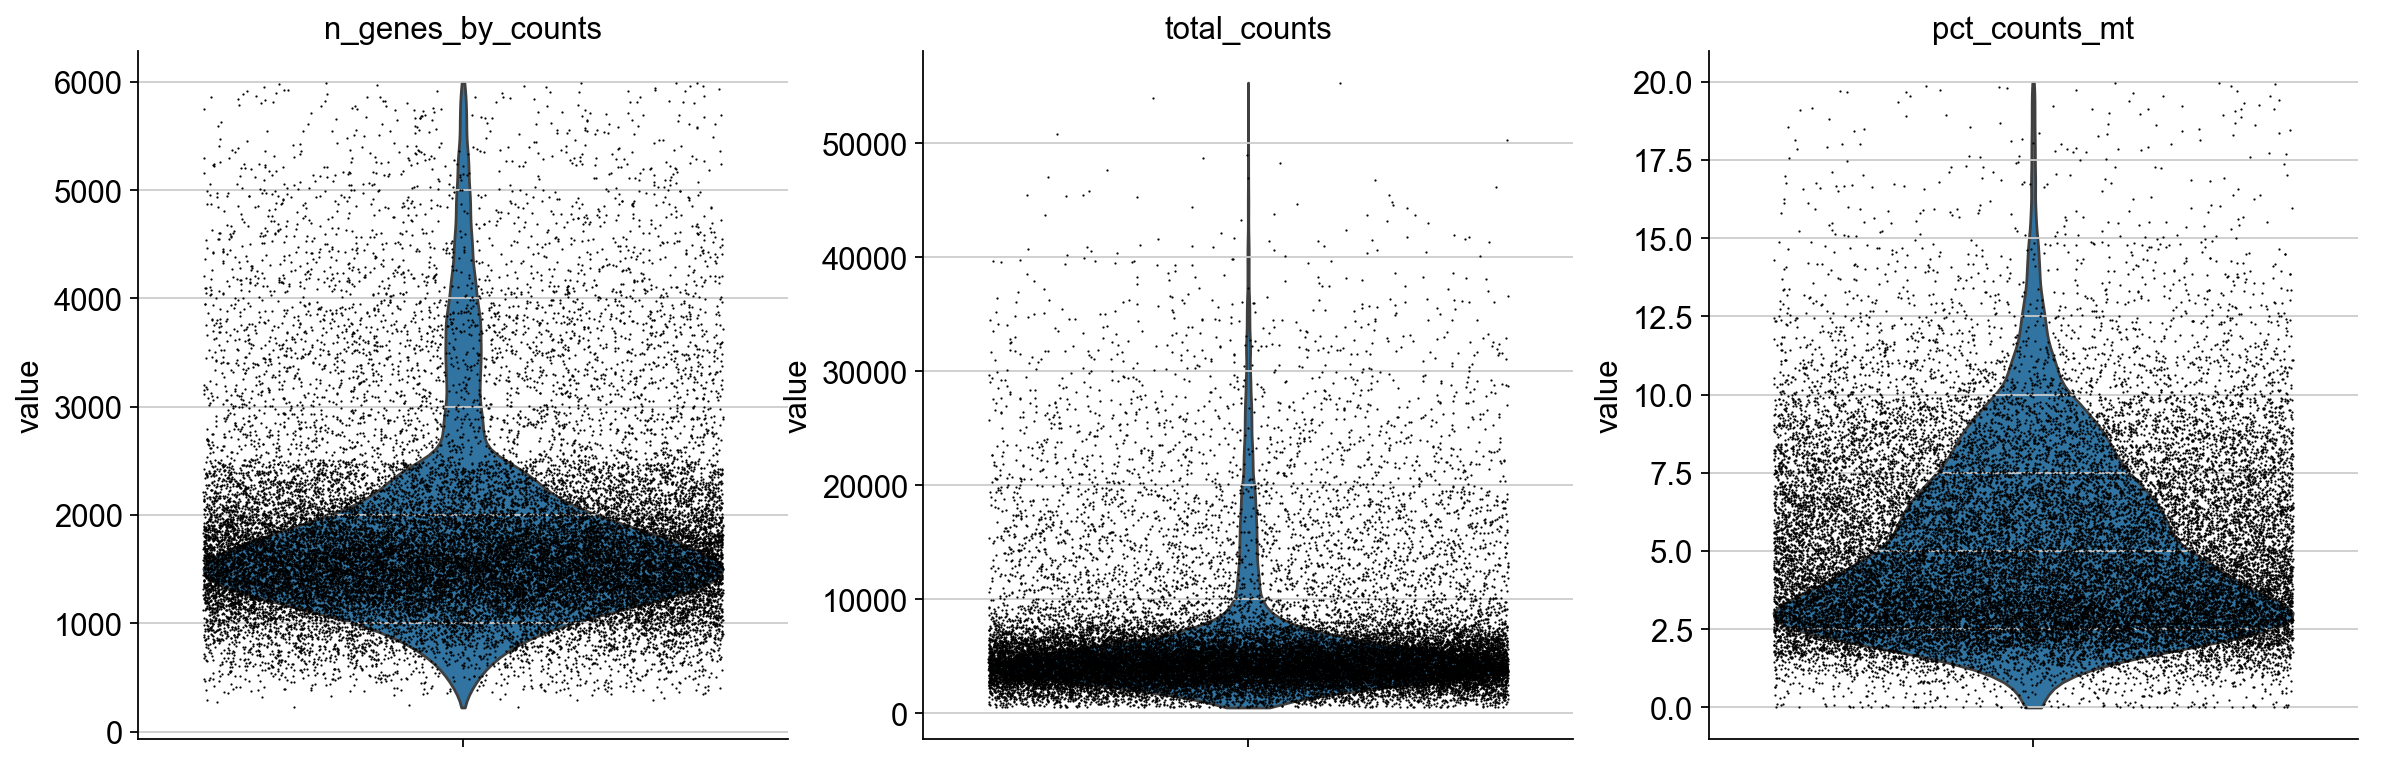

In [12]:
# mitochondrial genes filtering
adata.var['mt'] = adata.var_names.str.startswith ('MT-')
sc.pp.calculate_qc_metrics (adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True )
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

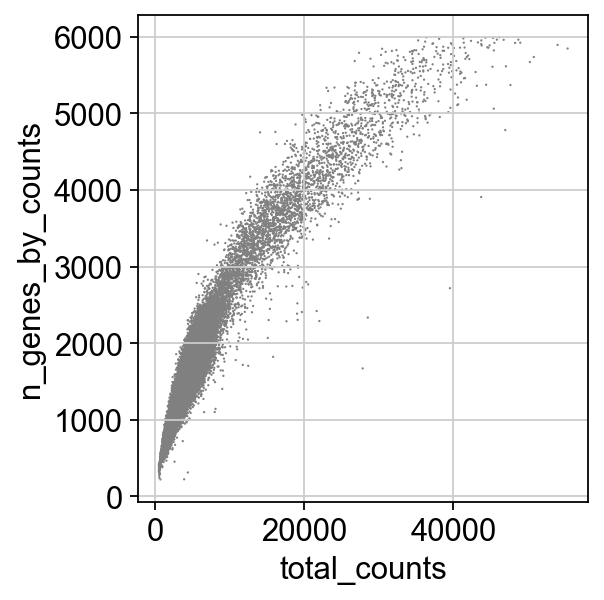

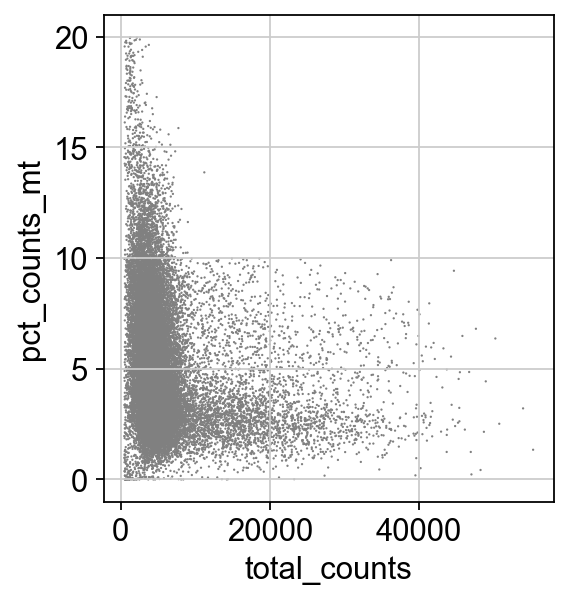

In [13]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [14]:
adata = adata[adata.obs.n_genes_by_counts <6000, :]
adata = adata[adata.obs.pct_counts_mt <5, :]

In [15]:
# Normalise the data
sc.pp.normalize_total(adata, target_sum=1e4)

/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [16]:
# log transform the data
sc.pp.log1p(adata)

In [17]:
# Finding highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [18]:
adata.var['highly_variable']

AL627309.1     False
AL627309.5     False
AP006222.2     False
LINC01409      False
FAM87B         False
               ...  
AP001468.58    False
AP001469.9     False
BX004987.4     False
AC145212.4     False
AC145212.2     False
Name: highly_variable, Length: 26256, dtype: bool

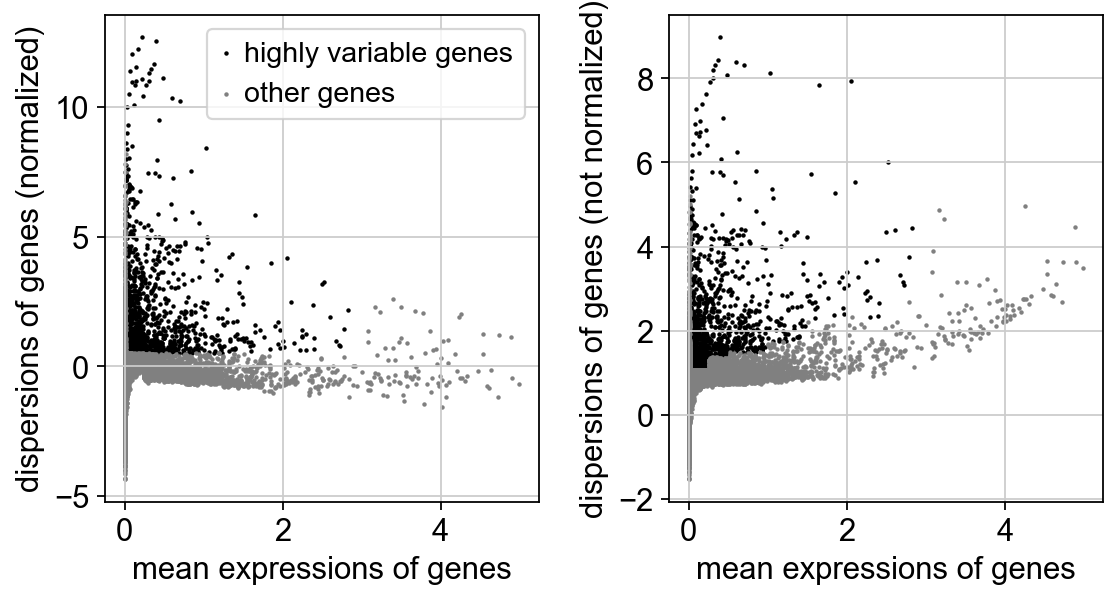

In [19]:
# Plot
sc.pl.highly_variable_genes(adata)

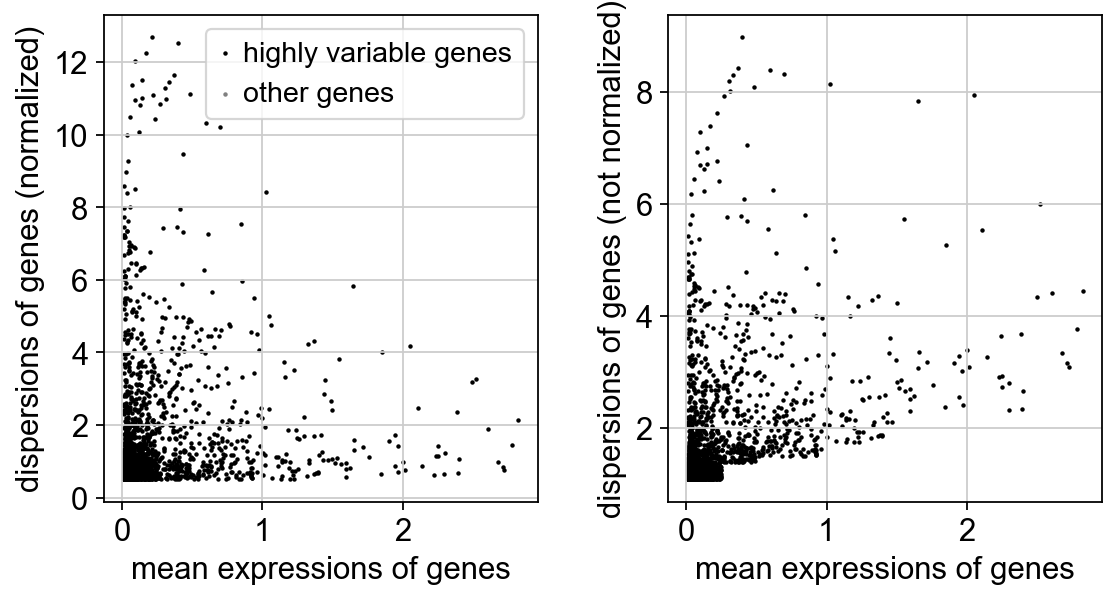

In [20]:
# Filter out the highly variable genes
adata = adata[:, adata.var.highly_variable]
sc.pl.highly_variable_genes(adata)

In [21]:
# Scale the data
sc.pp.scale(adata, max_value=10)

/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    with n_comps=50
    finished (0:00:06)


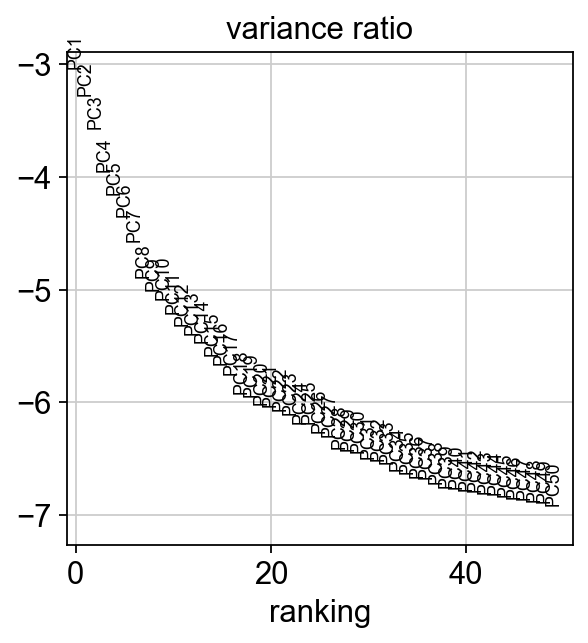

In [22]:
# Dimensionality Reduction
# Principal Component Analysis
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)
results_file ='/Users/christophertarkaa/Desktop/Bioinformatics/scRNA-Seq analysis/results.h5ad'
adata.write(results_file) #Save the result.

In [23]:
# Finding the neighbors by computing the neighbourhood graph
sc.pp.neighbors(adata, n_pcs = 30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:26)


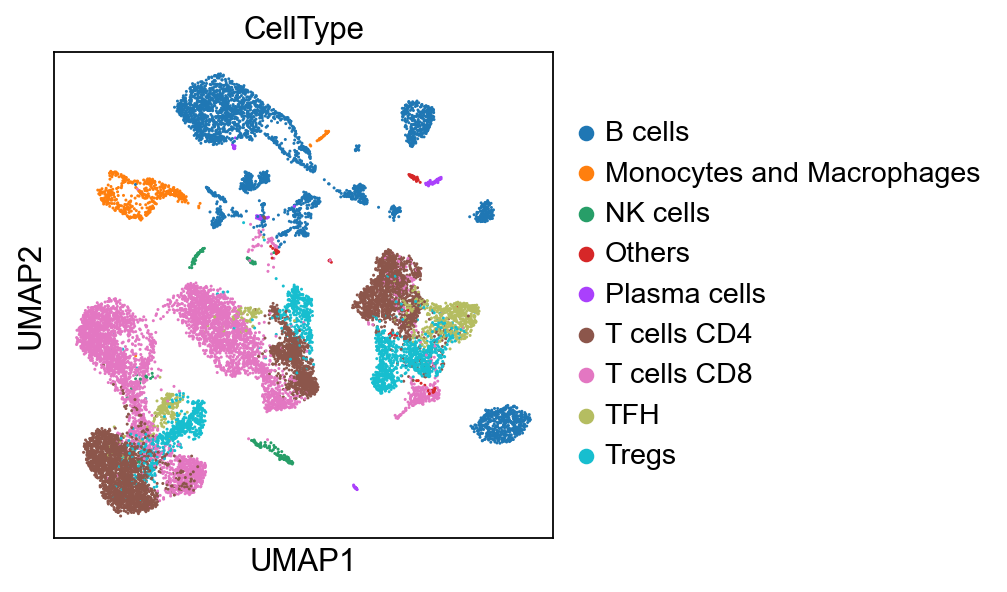

In [24]:
# Embedding the neighborhood graph by running UMAP
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CellType'])

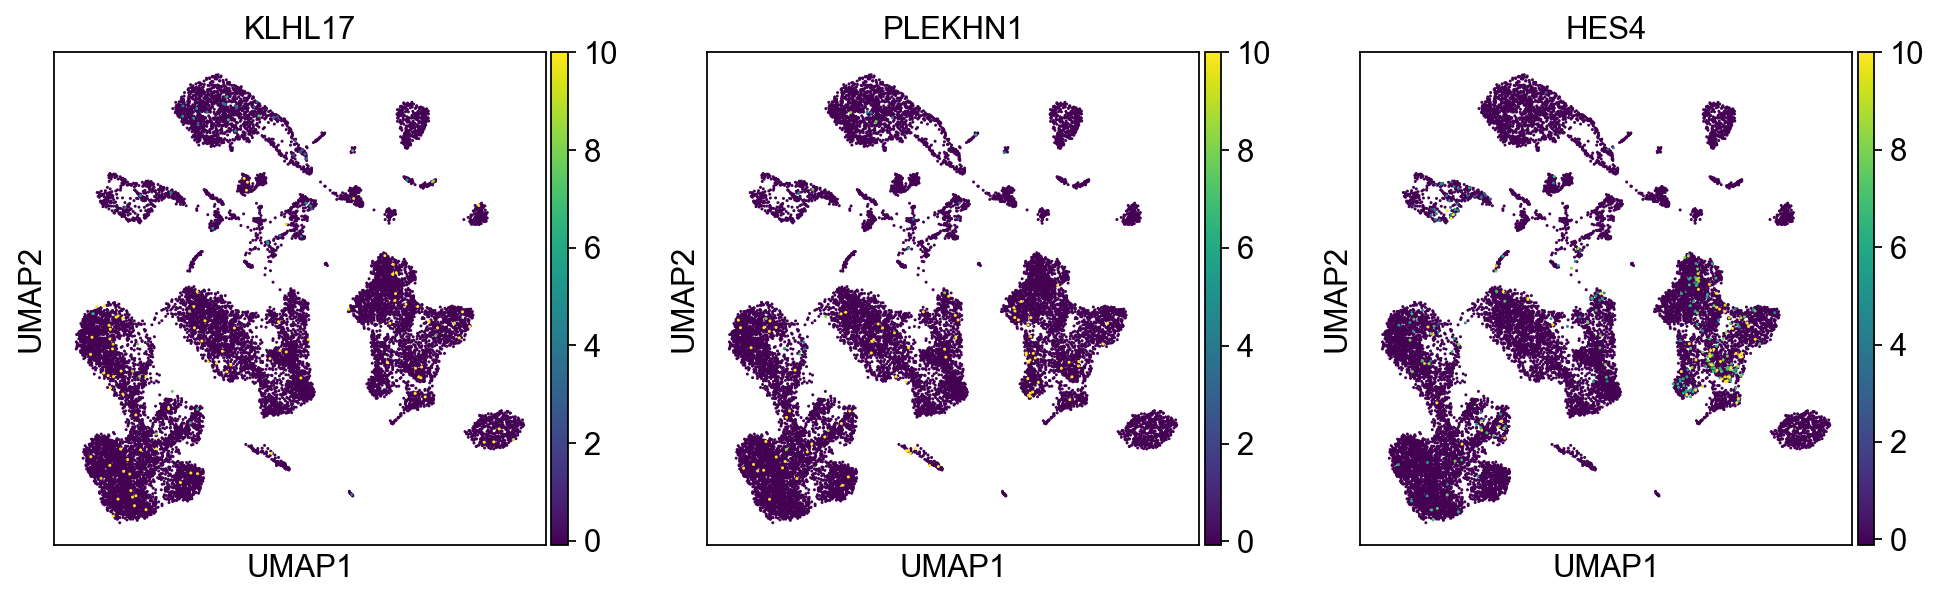

In [25]:
# Visualisation for specific cells
sc.pl.umap(adata, color=['KLHL17', 'PLEKHN1', 'HES4'])

In [26]:
adata.write(results_file)

In [27]:
# Clustering the neighbourhood graph
cluster_count = []  # Initialize an empty list to store cluster counts

# pip3 install leidenalg

for resolution in np.arange(0.1, 2, 0.1):
    # Run the Leiden algorithm
    sc.tl.leiden(adata, resolution=resolution)
    # Get the number of clusters
    n_clusters = len(adata.obs['leiden'].unique())
    # Append the number of clusters to the list
    cluster_count.append(n_clusters)

print(cluster_count)  # Print the list of cluster counts

running Leiden clustering


/var/folders/z7/6grx_vds7rj1h9xg7_ftcjcw0000gn/T/ipykernel_33572/1180099448.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution)


    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 30 clusters and added
    'l

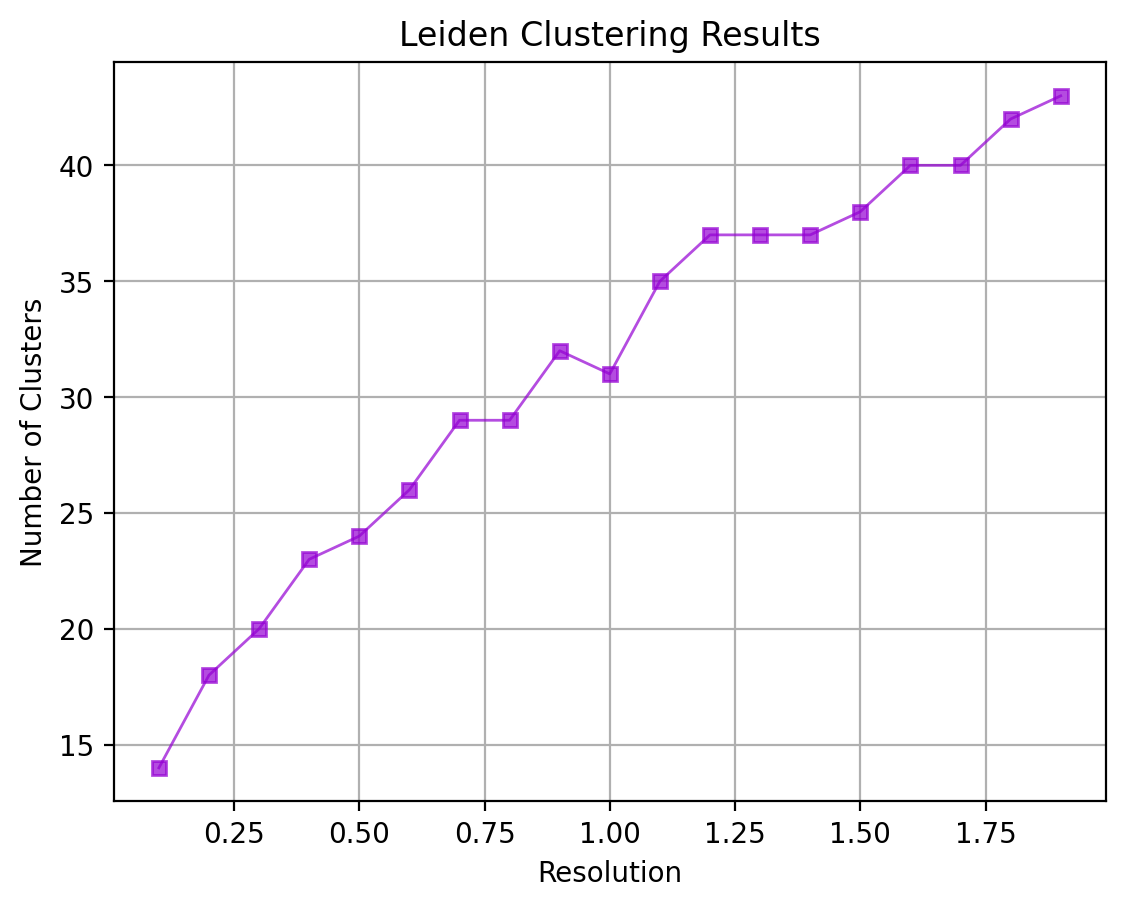

In [28]:
# Plot
resolution = np.arange(0.1, 2, 0.1)  
cluster_count = [14, 18, 20, 23, 24, 26, 29, 29, 32, 31, 35, 37, 37, 37, 38, 40, 40, 42, 43]  

plt.style.use('default')
plt.plot(resolution, cluster_count, marker='s', alpha=0.7, markersize=5, color='darkviolet', linewidth=1)
plt.xlabel('Resolution')
plt.ylabel('Number of Clusters')
plt.title('Leiden Clustering Results')
plt.grid(True)
plt.show()

In [29]:
# Choosing the right cluster resolution for 9 clusters
sc.tl.leiden(adata, resolution=0.0075)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


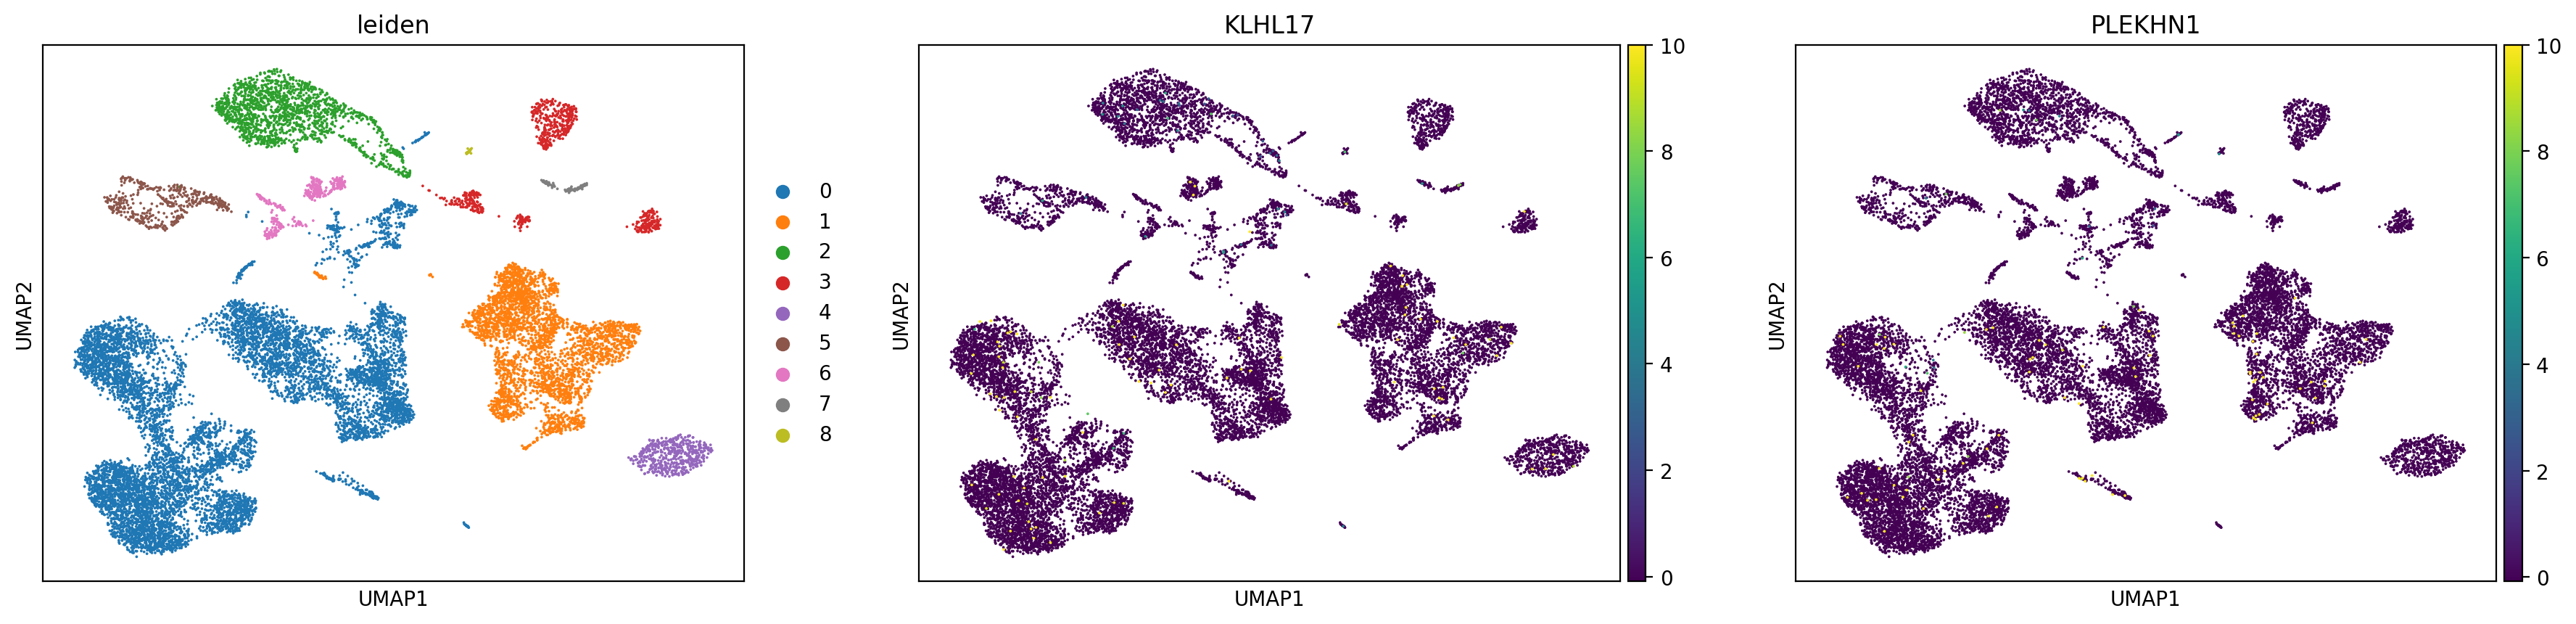

In [30]:
sc.pl.umap(adata, color= ['leiden', 'KLHL17', 'PLEKHN1'])

In [31]:
adata.obs

ID   Patient     Sample     CellType  \
0      AAACCTGAGTTAAGTG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
1      AAACCTGCATGTAAGA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
2      AAACCTGTCGCGCCAA_DLBCL002B  DLBCL002  DLBCL002B      B cells   
3      AAACGGGAGACTTTCG_DLBCL002B  DLBCL002  DLBCL002B      B cells   
4      AAACGGGCATGTTGAC_DLBCL002B  DLBCL002  DLBCL002B      B cells   
...                           ...       ...        ...          ...   
28399       TTTCCTCTCCCTCAGT_T2NB        T2       T2NB  T cells CD4   
28401       TTTCCTCTCGTCACGG_T2NB        T2       T2NB        Tregs   
28403       TTTGGTTCAAGGACTG_T2NB        T2       T2NB  T cells CD4   
28408       TTTGGTTGTTCCACGG_T2NB        T2       T2NB  T cells CD4   
28409       TTTGGTTTCGGTGTTA_T2NB        T2       T2NB  T cells CD8   

      TumorNormal  COO  Tissue  n_genes  n_genes_by_counts  total_counts  \
0          Normal  ABC   DLBCL     1096               1096        2791.0   
1           Tumor  ABC   DLBCL     3690               3690       18301.0   
2           Tumor  ABC   DLBCL     5208               5207       40609.0   
3           Tumor  ABC   DLBCL     2887               2886       11841.0   
4           Tumor  ABC   DLBCL     2791               2791        9407.0   
...           ...  ...     ...      ...                ...           ...   
28399      Normal  NaN  Tonsil     2196               2196        7764.0   
28401      Normal  NaN  Tonsil     1255               1255        2586.0   
28403      Normal  NaN  Tonsil     1646               1646        5072.0   
28408      Normal  NaN  Tonsil     1521               1521        5674.0   
28409      Normal  NaN  Tonsil     1237               1237        2754.0   

       total_counts_mt  pct_counts_mt leiden  
0                 94.0       3.367969      6  
1                632.0       3.453363      2  
2               1090.0       2.684134      2  
3                 69.0       0.582721      2  
4                302.0       3.210375      2  
...                ...            ...    ...  
28399            351.0       4.520865      1  
28401            117.0       4.524362      1  
28403            118.0       2.326498      1  
28408            243.0       4.282693      1  
28409             80.0       2.904866      1  

[16419 rows x 13 columns]

In [32]:
# Finding marker genes:
sc.tl.rank_genes_groups(adata, 'leiden', method="t-test", key_added="t-test")

ranking genes
    finished: added to `.uns['t-test']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_ra

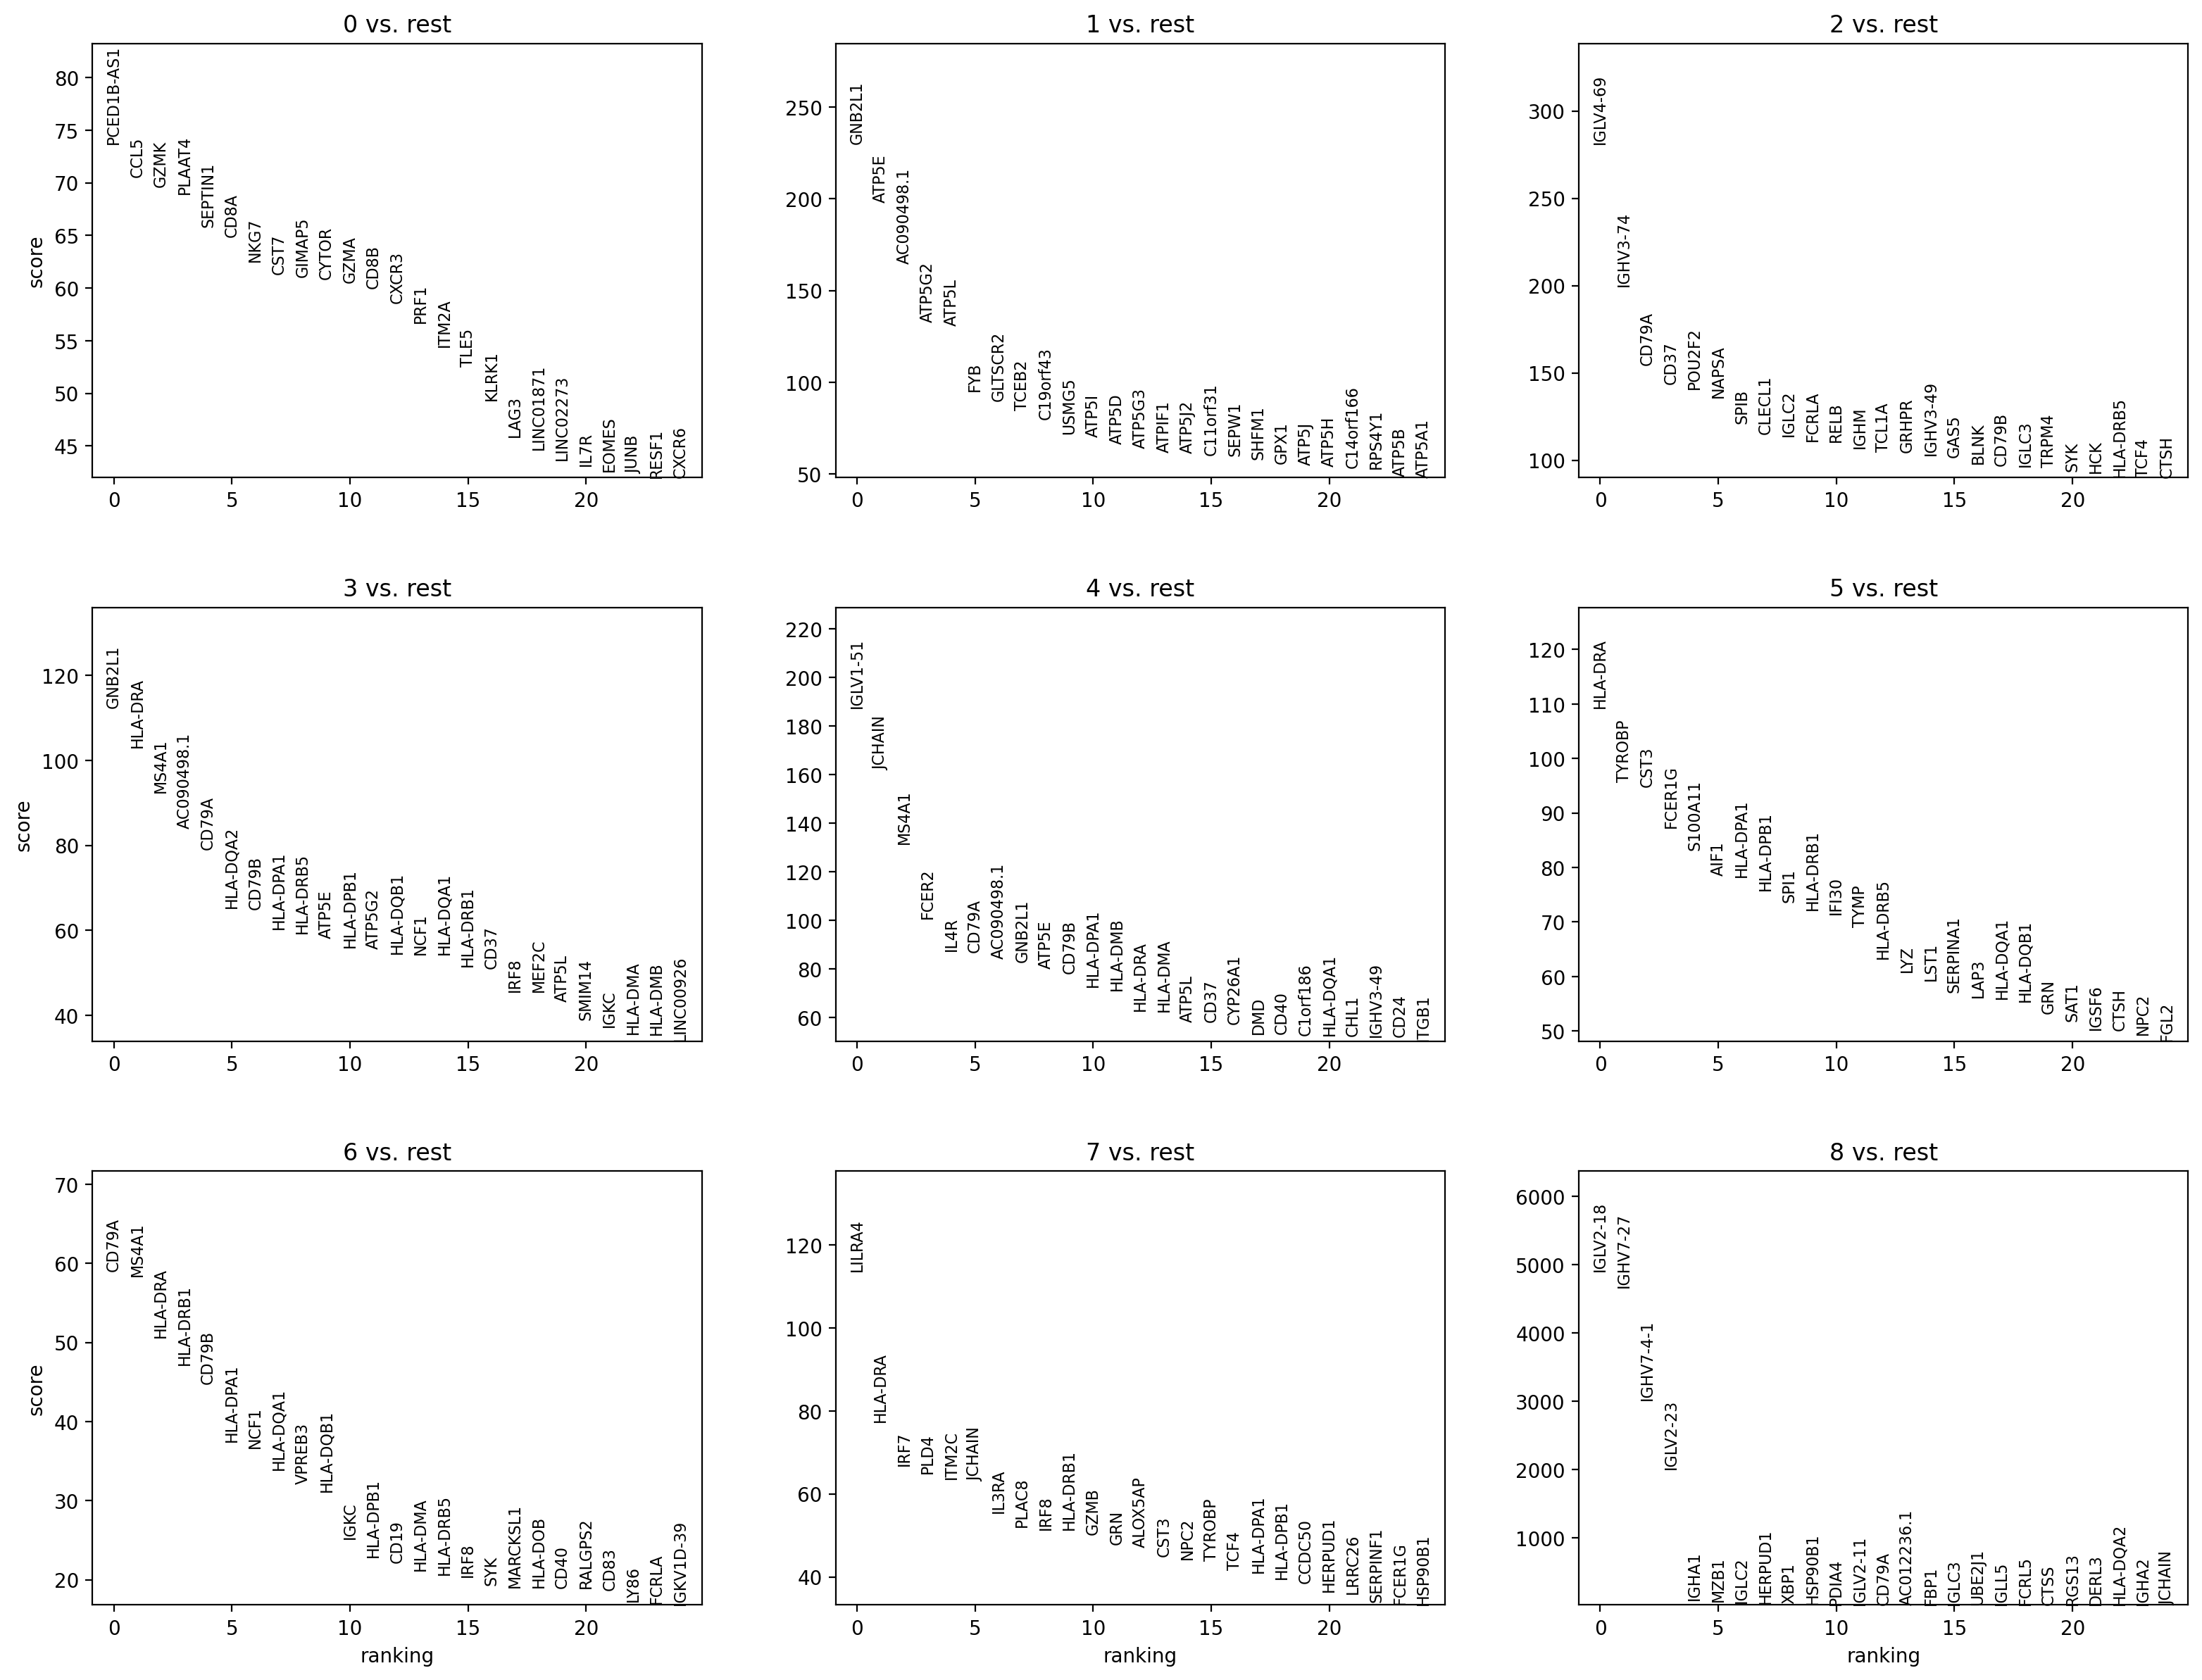

In [33]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="t-test", ncols=3)

In [34]:
# using wilcoxon 
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added='wilcoxon')

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_ra

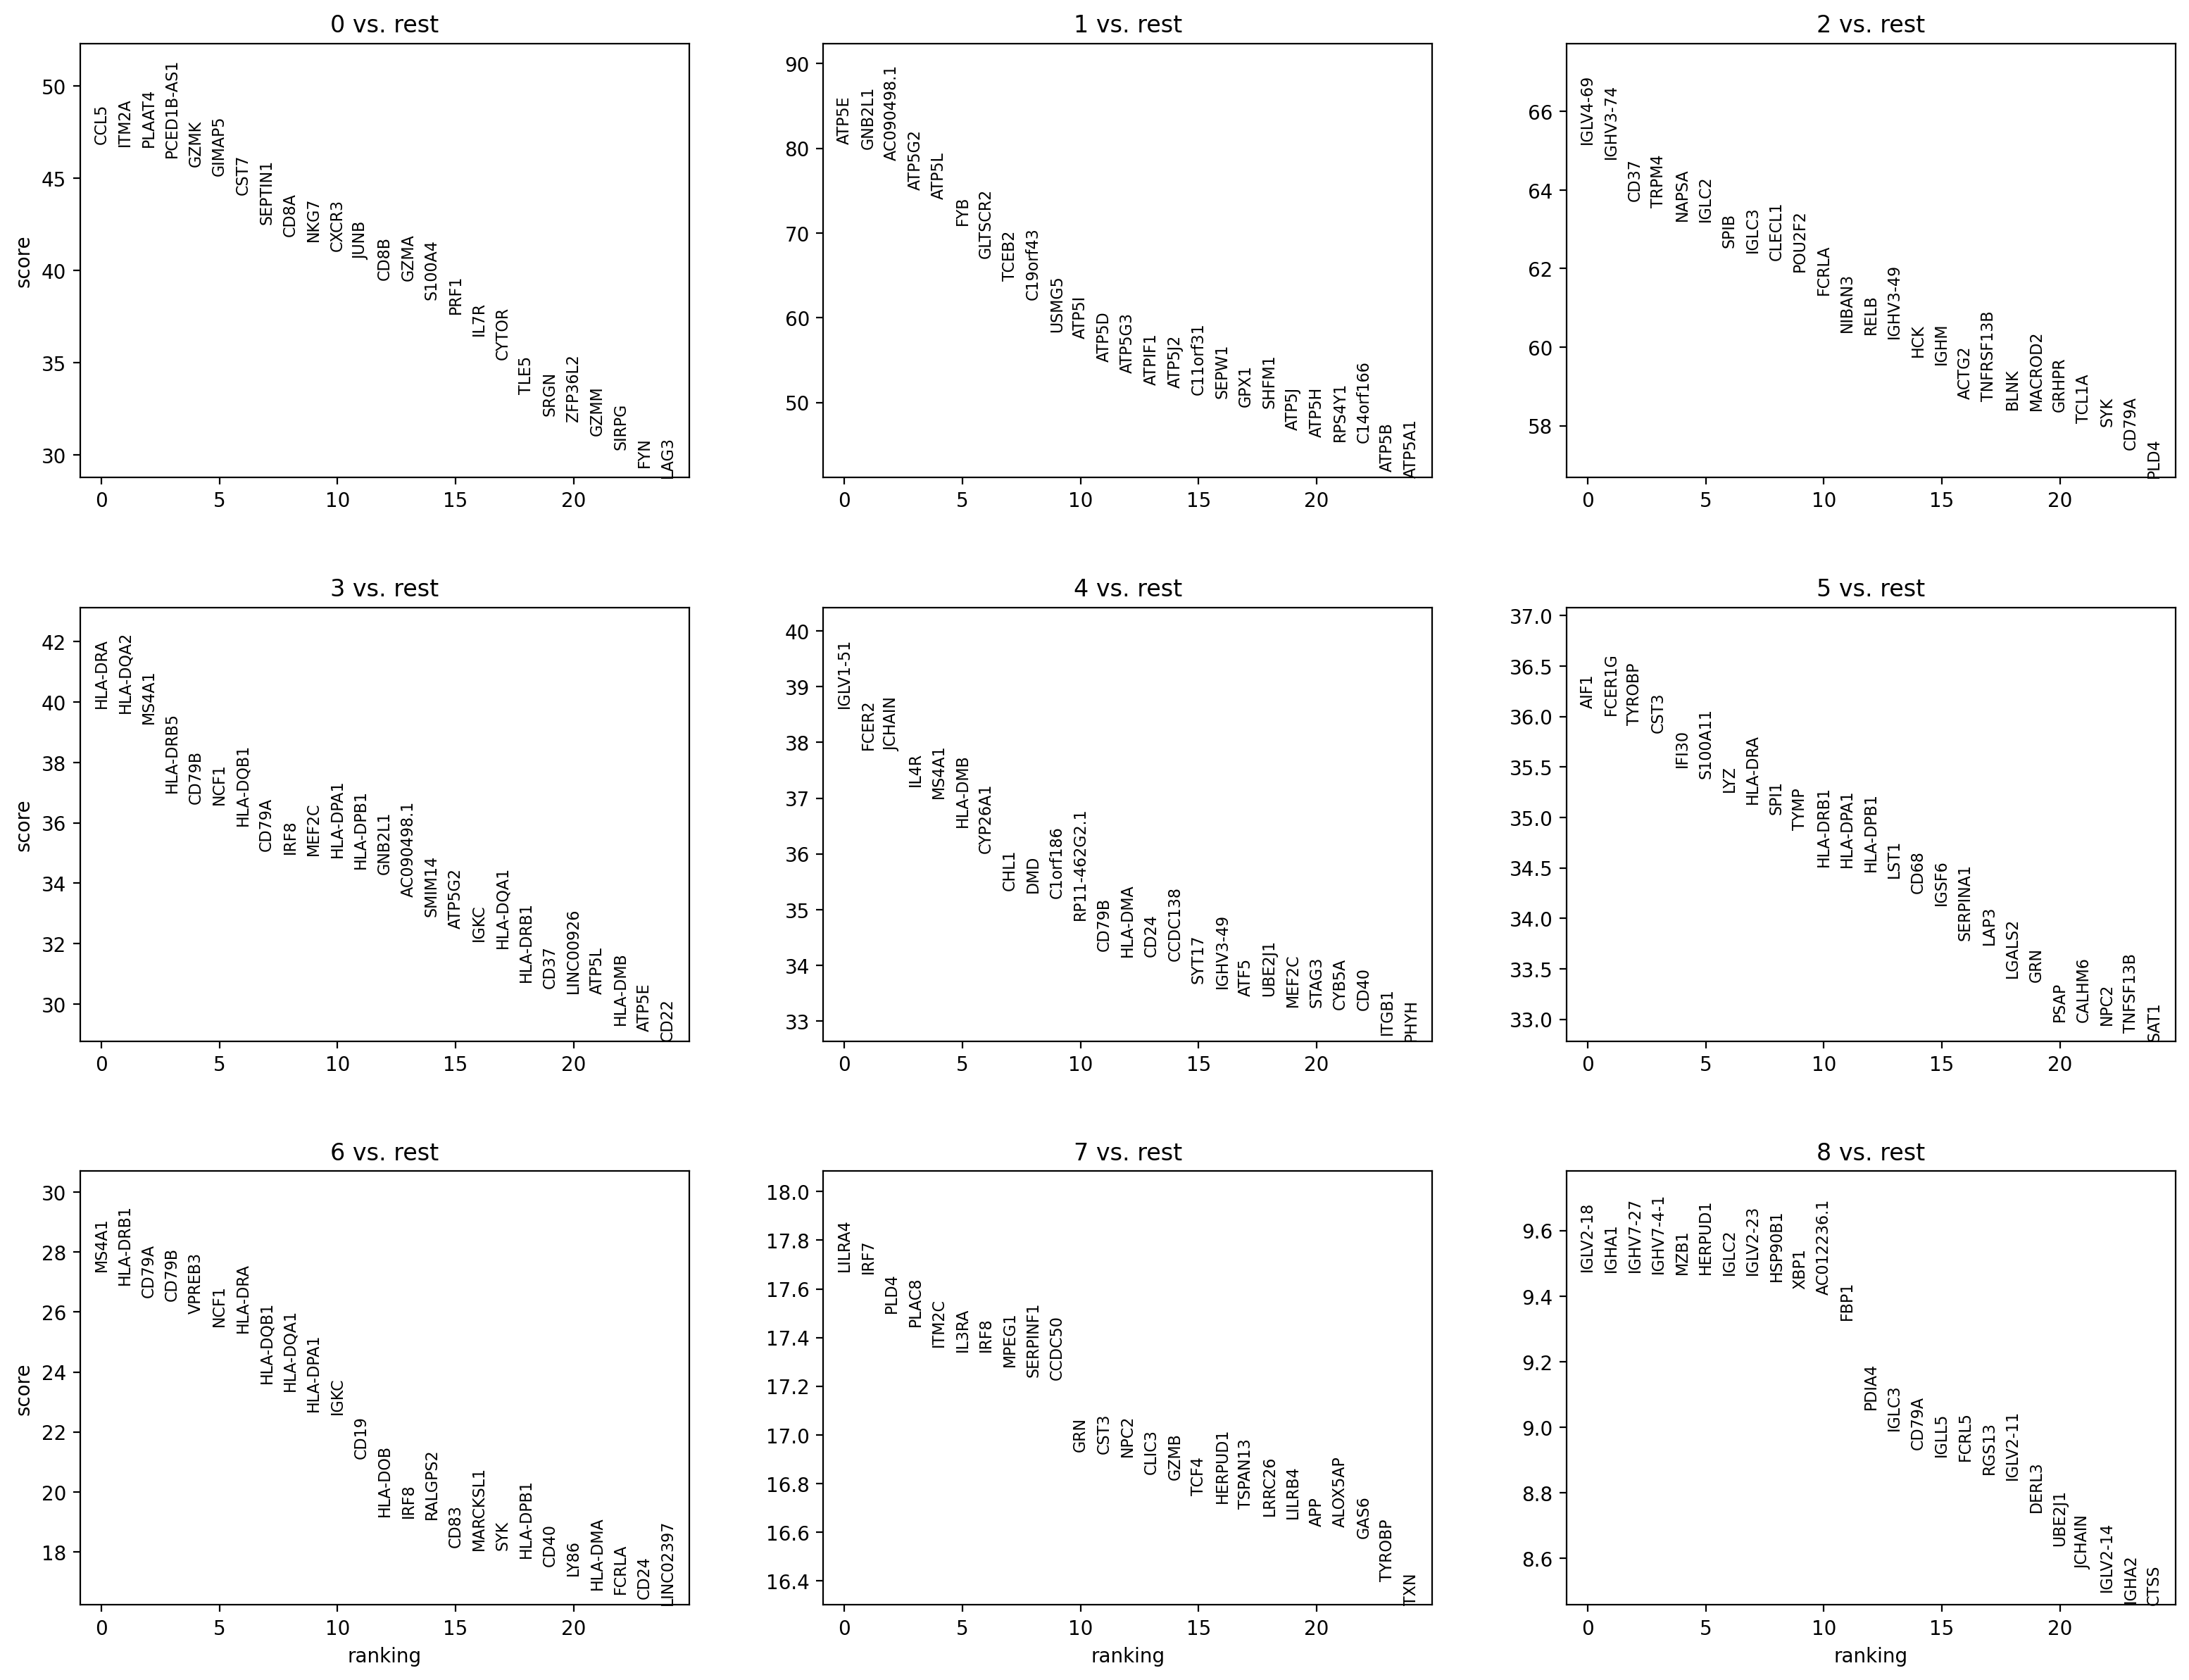

In [35]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='wilcoxon', ncols=3)

In [36]:
len(adata.uns['wilcoxon']['names']['0'])

2069

In [37]:
pd.DataFrame(adata.uns['wilcoxon']['names']).head(5)

0           1         2         3         4       5         6  \
0        CCL5       ATP5E  IGLV4-69   HLA-DRA  IGLV1-51    AIF1     MS4A1   
1       ITM2A      GNB2L1  IGHV3-74  HLA-DQA2     FCER2  FCER1G  HLA-DRB1   
2      PLAAT4  AC090498.1      CD37     MS4A1    JCHAIN  TYROBP     CD79A   
3  PCED1B-AS1      ATP5G2     TRPM4  HLA-DRB5      IL4R    CST3     CD79B   
4        GZMK       ATP5L     NAPSA     CD79B     MS4A1   IFI30    VPREB3   

        7          8  
0  LILRA4   IGLV2-18  
1    IRF7      IGHA1  
2    PLD4   IGHV7-27  
3   PLAC8  IGHV7-4-1  
4   ITM2C       MZB1

In [38]:
# Save differentially expressed genes between clusters which are ranked by score
result = adata.uns['wilcoxon']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n  0_p         1_n  1_p       2_n  2_p       3_n            3_p  \
0        CCL5  0.0       ATP5E  0.0  IGLV4-69  0.0   HLA-DRA   0.000000e+00   
1       ITM2A  0.0      GNB2L1  0.0  IGHV3-74  0.0  HLA-DQA2   0.000000e+00   
2      PLAAT4  0.0  AC090498.1  0.0      CD37  0.0     MS4A1   0.000000e+00   
3  PCED1B-AS1  0.0      ATP5G2  0.0     TRPM4  0.0  HLA-DRB5  1.079940e-299   
4        GZMK  0.0       ATP5L  0.0     NAPSA  0.0     CD79B  6.525302e-294   

        4_n            4_p     5_n            5_p       6_n            6_p  \
0  IGLV1-51   0.000000e+00    AIF1  3.298086e-285     MS4A1  8.289494e-165   
1     FCER2   0.000000e+00  FCER1G  4.967026e-284  HLA-DRB1  1.011423e-159   
2    JCHAIN   0.000000e+00  TYROBP  1.577338e-282     CD79A  9.406608e-155   
3      IL4R  3.019597e-303    CST3  2.416487e-281     CD79B  2.756045e-153   
4     MS4A1  8.104733e-300   IFI30  4.852284e-276    VPREB3  1.278259e-148   

      7_n           7_p        8_n           8_p  
0  LILRA4  6.858125e-70   IGLV2-18  2.653331e-21  
1    IRF7  7.750181e-70      IGHA1  2.667084e-21  
2    PLD4  1.341537e-68   IGHV7-27  2.682889e-21  
3   PLAC8  3.596329e-68  IGHV7-4-1  2.773531e-21  
4   ITM2C  1.543991e-67       MZB1  2.860861e-21

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/opt/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


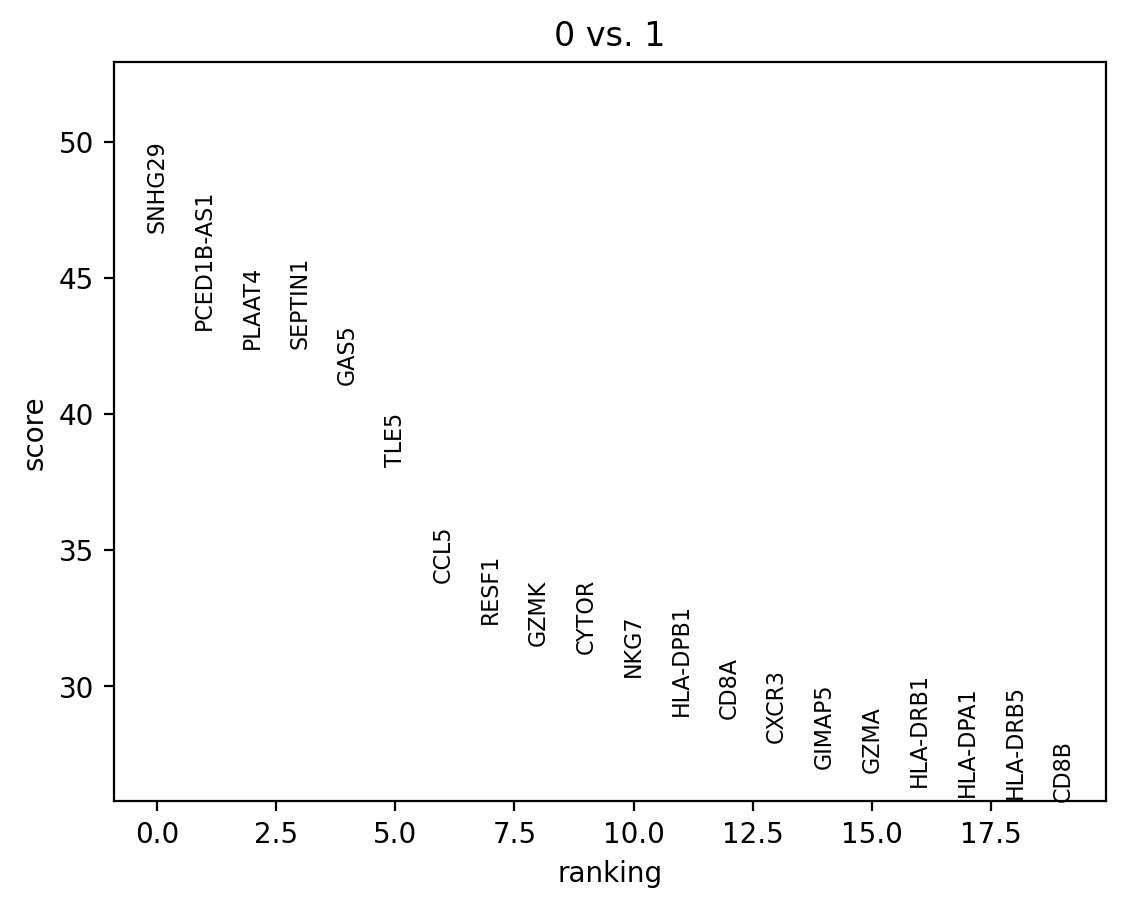

In [39]:
# Compare specific clusters
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

/opt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


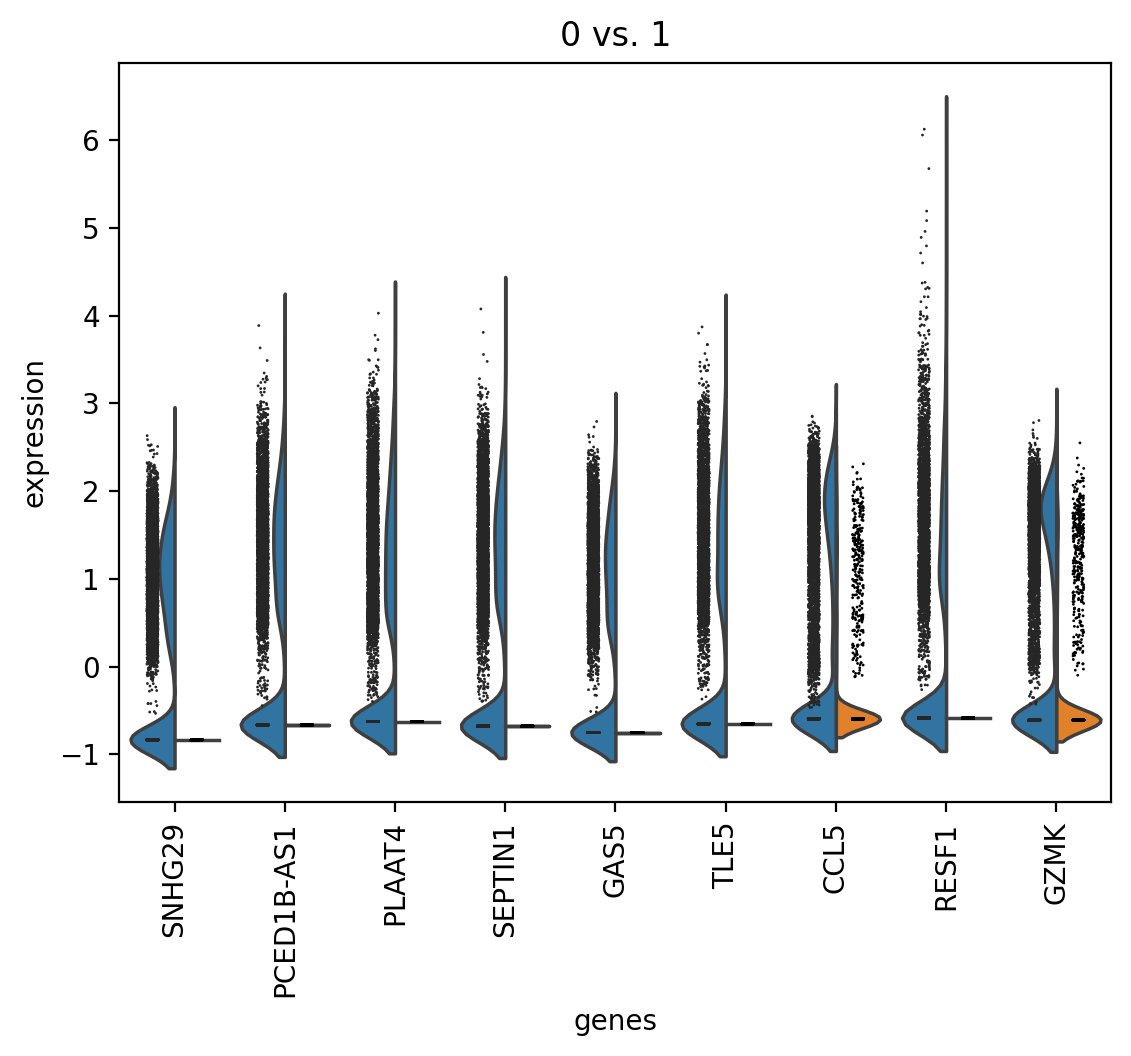

In [40]:
# Plot as violins of those 2 groups
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=9)

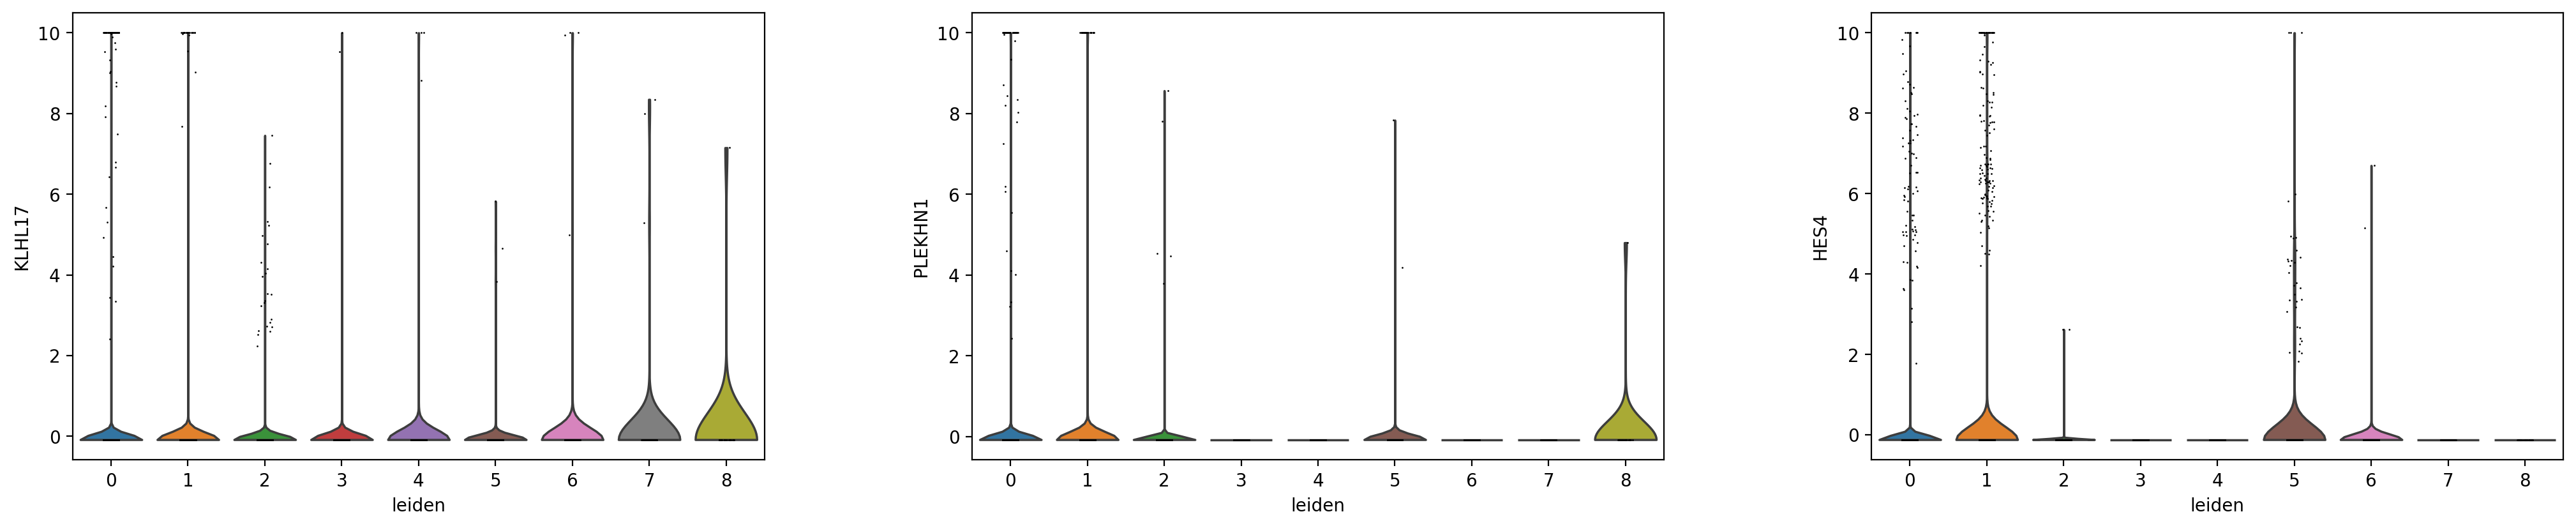

In [41]:
# compare certain gene across groups
sc.pl.violin(adata, ['KLHL17', 'PLEKHN1', 'HES4'], groupby='leiden')

In [42]:
# Mark cell type
new_cluster_names = [
    'B Cells', 'Monocytes and Macrophages',
    'NK', 'Others',
    'Plasma cells', 'T cell CD4',
    'T cell CD8', 'TFH', 'Tregs']
adata.rename_categories('leiden', new_cluster_names)

Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


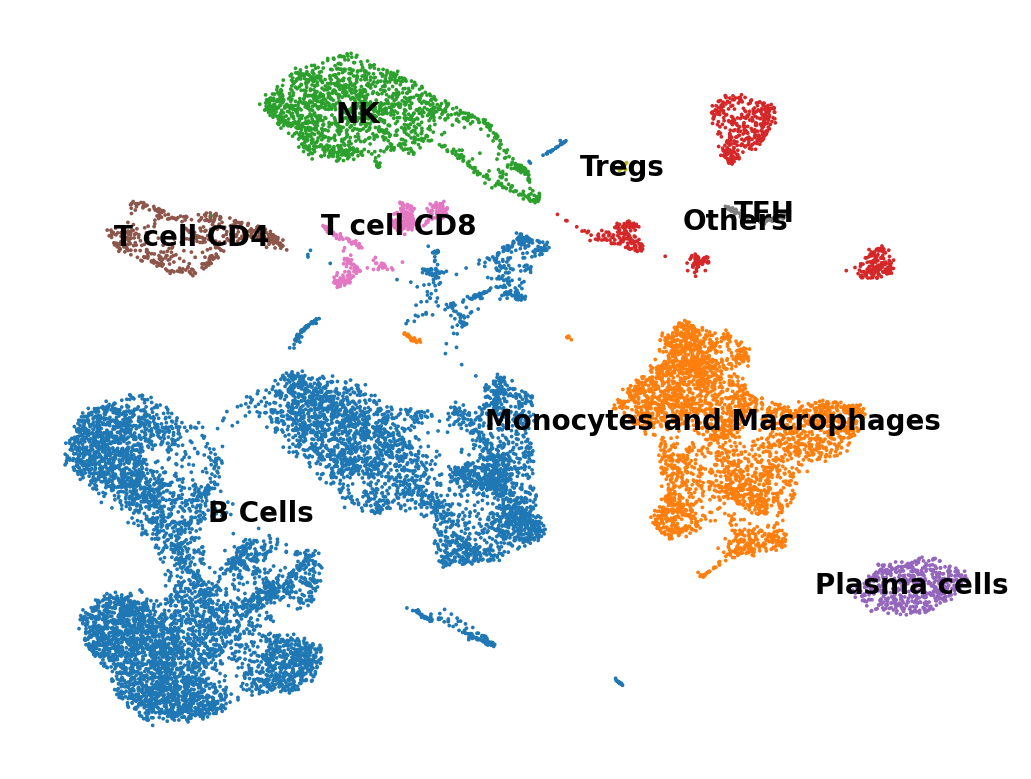

In [43]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


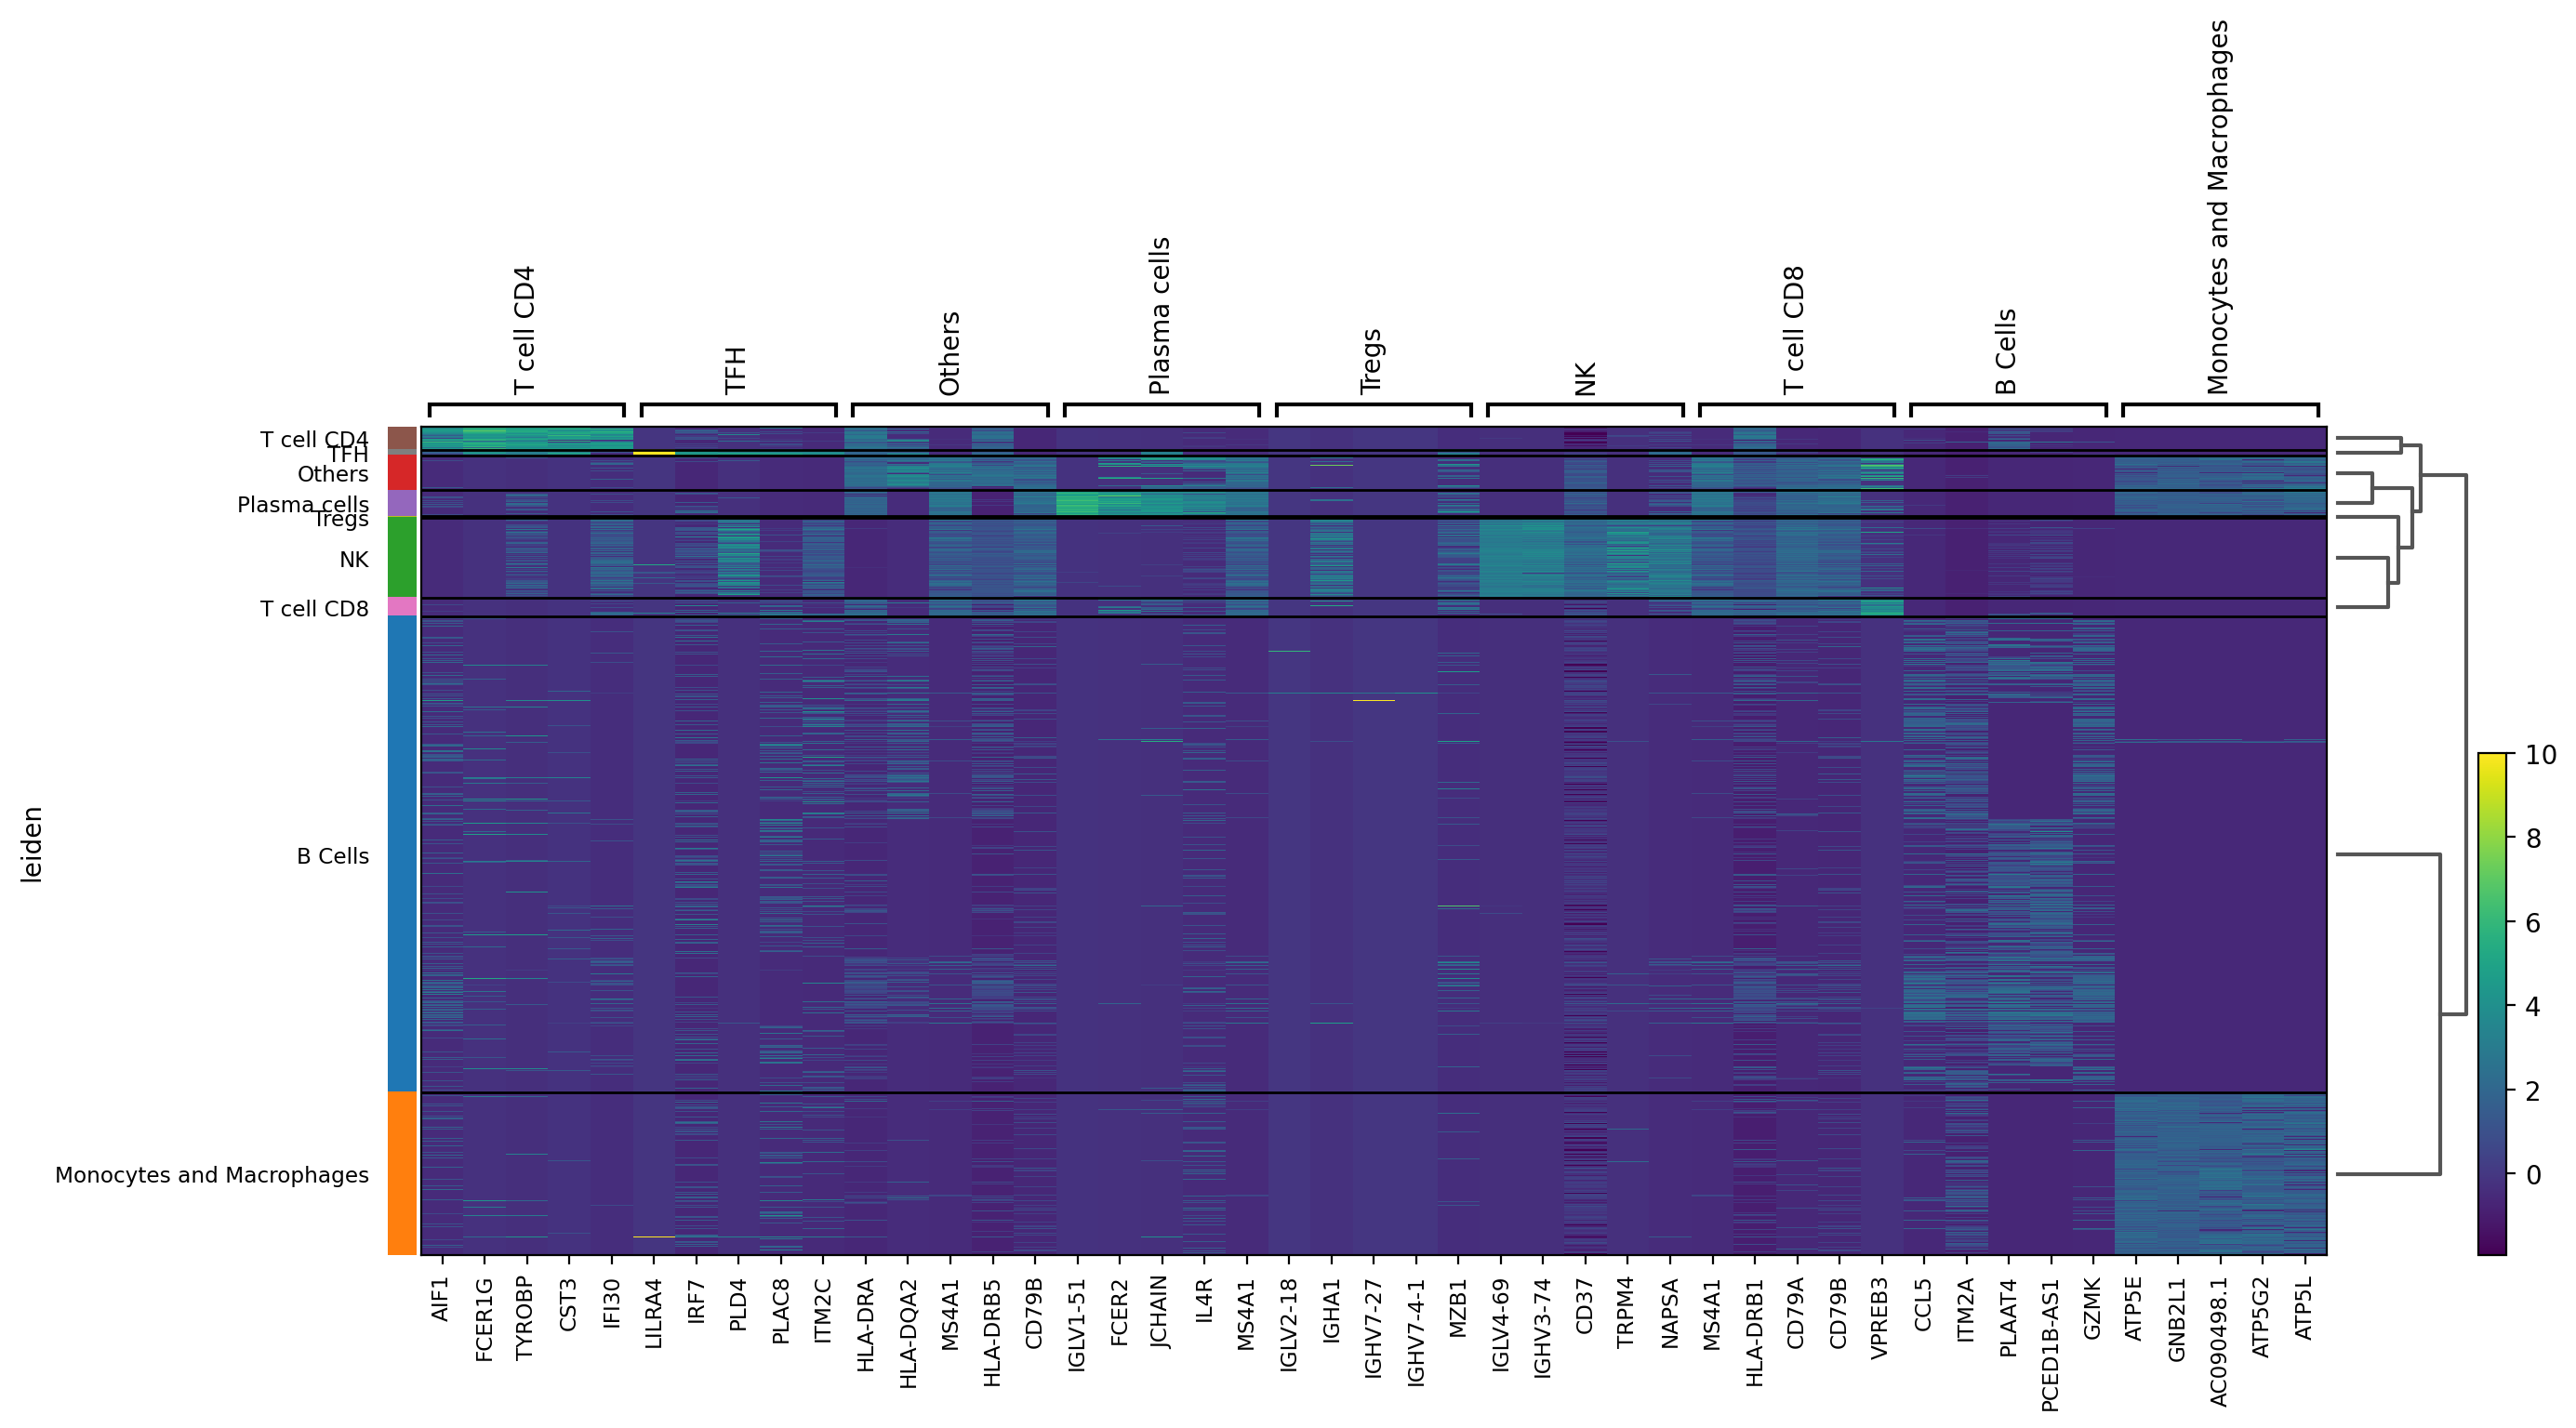

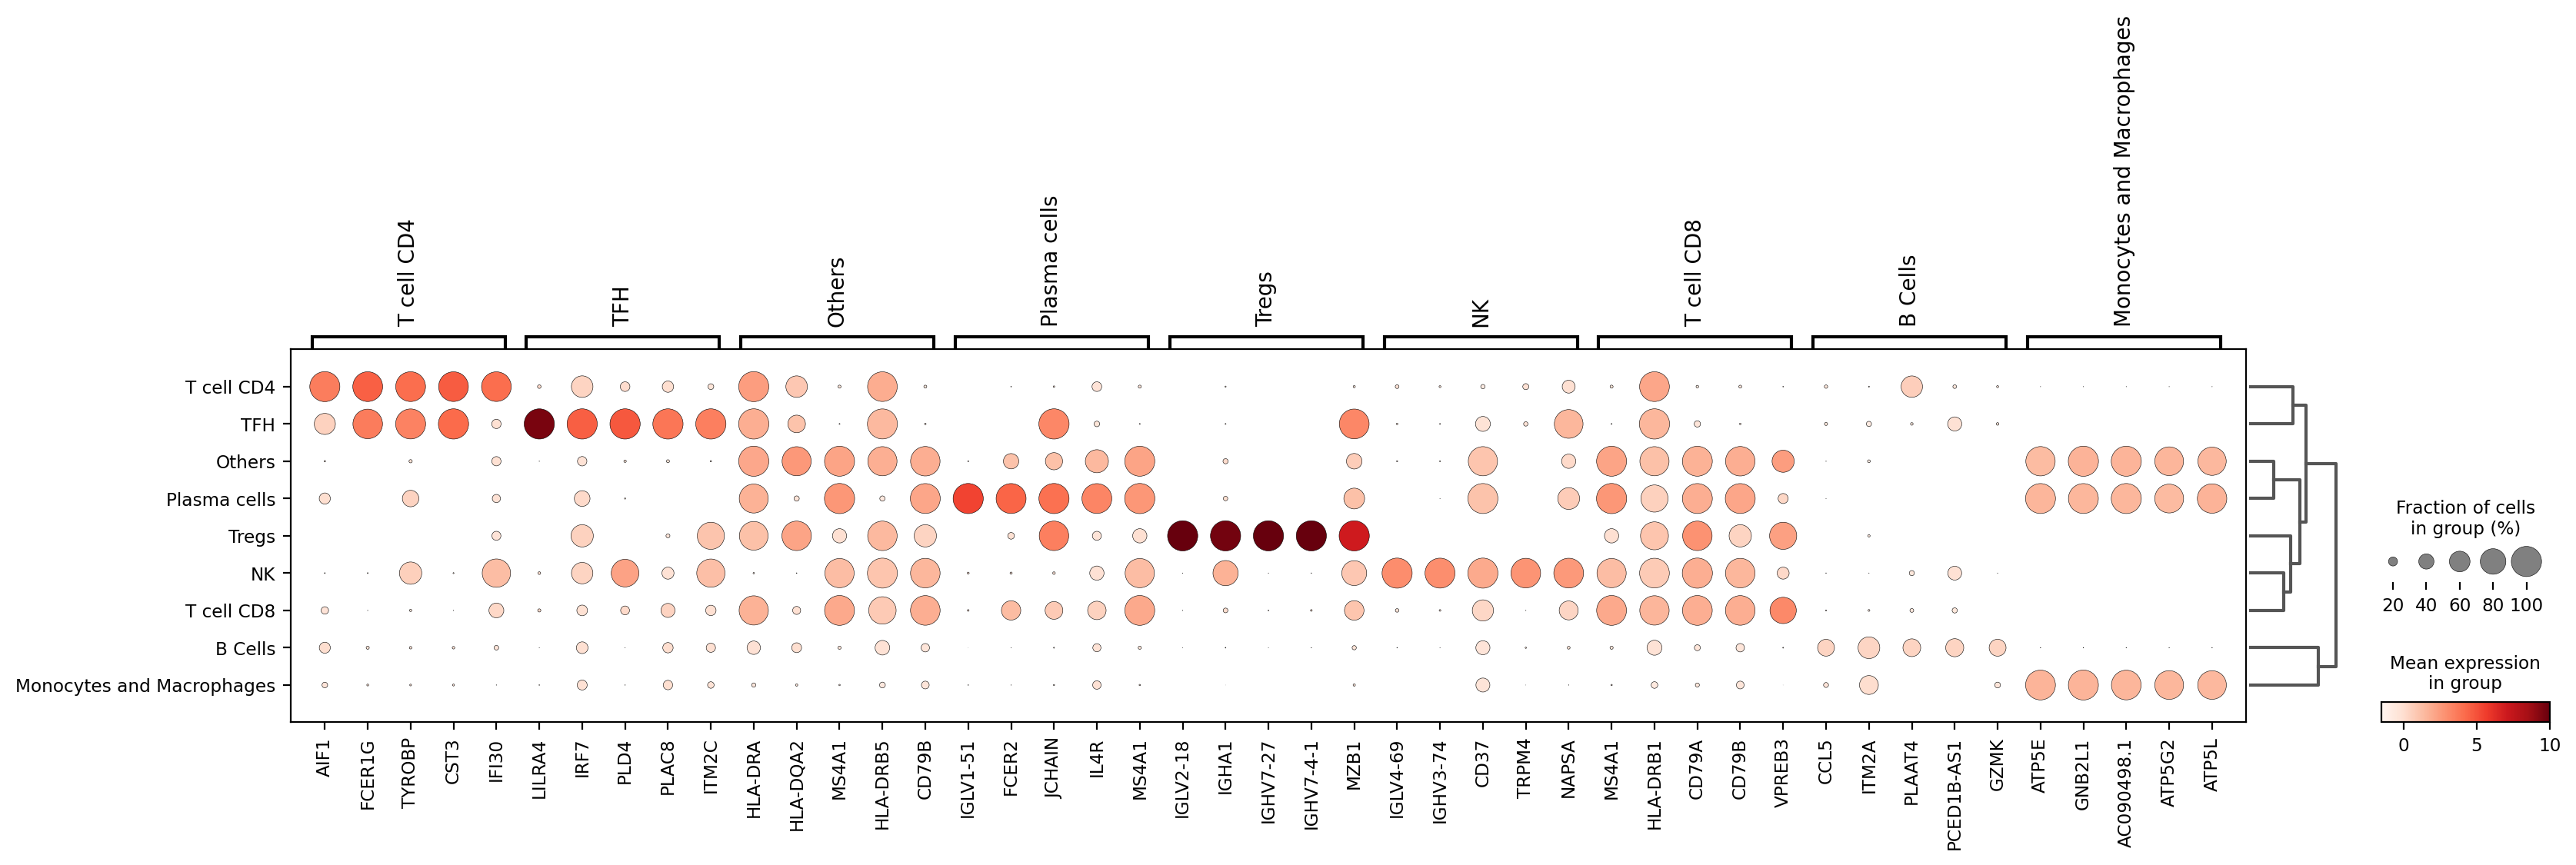

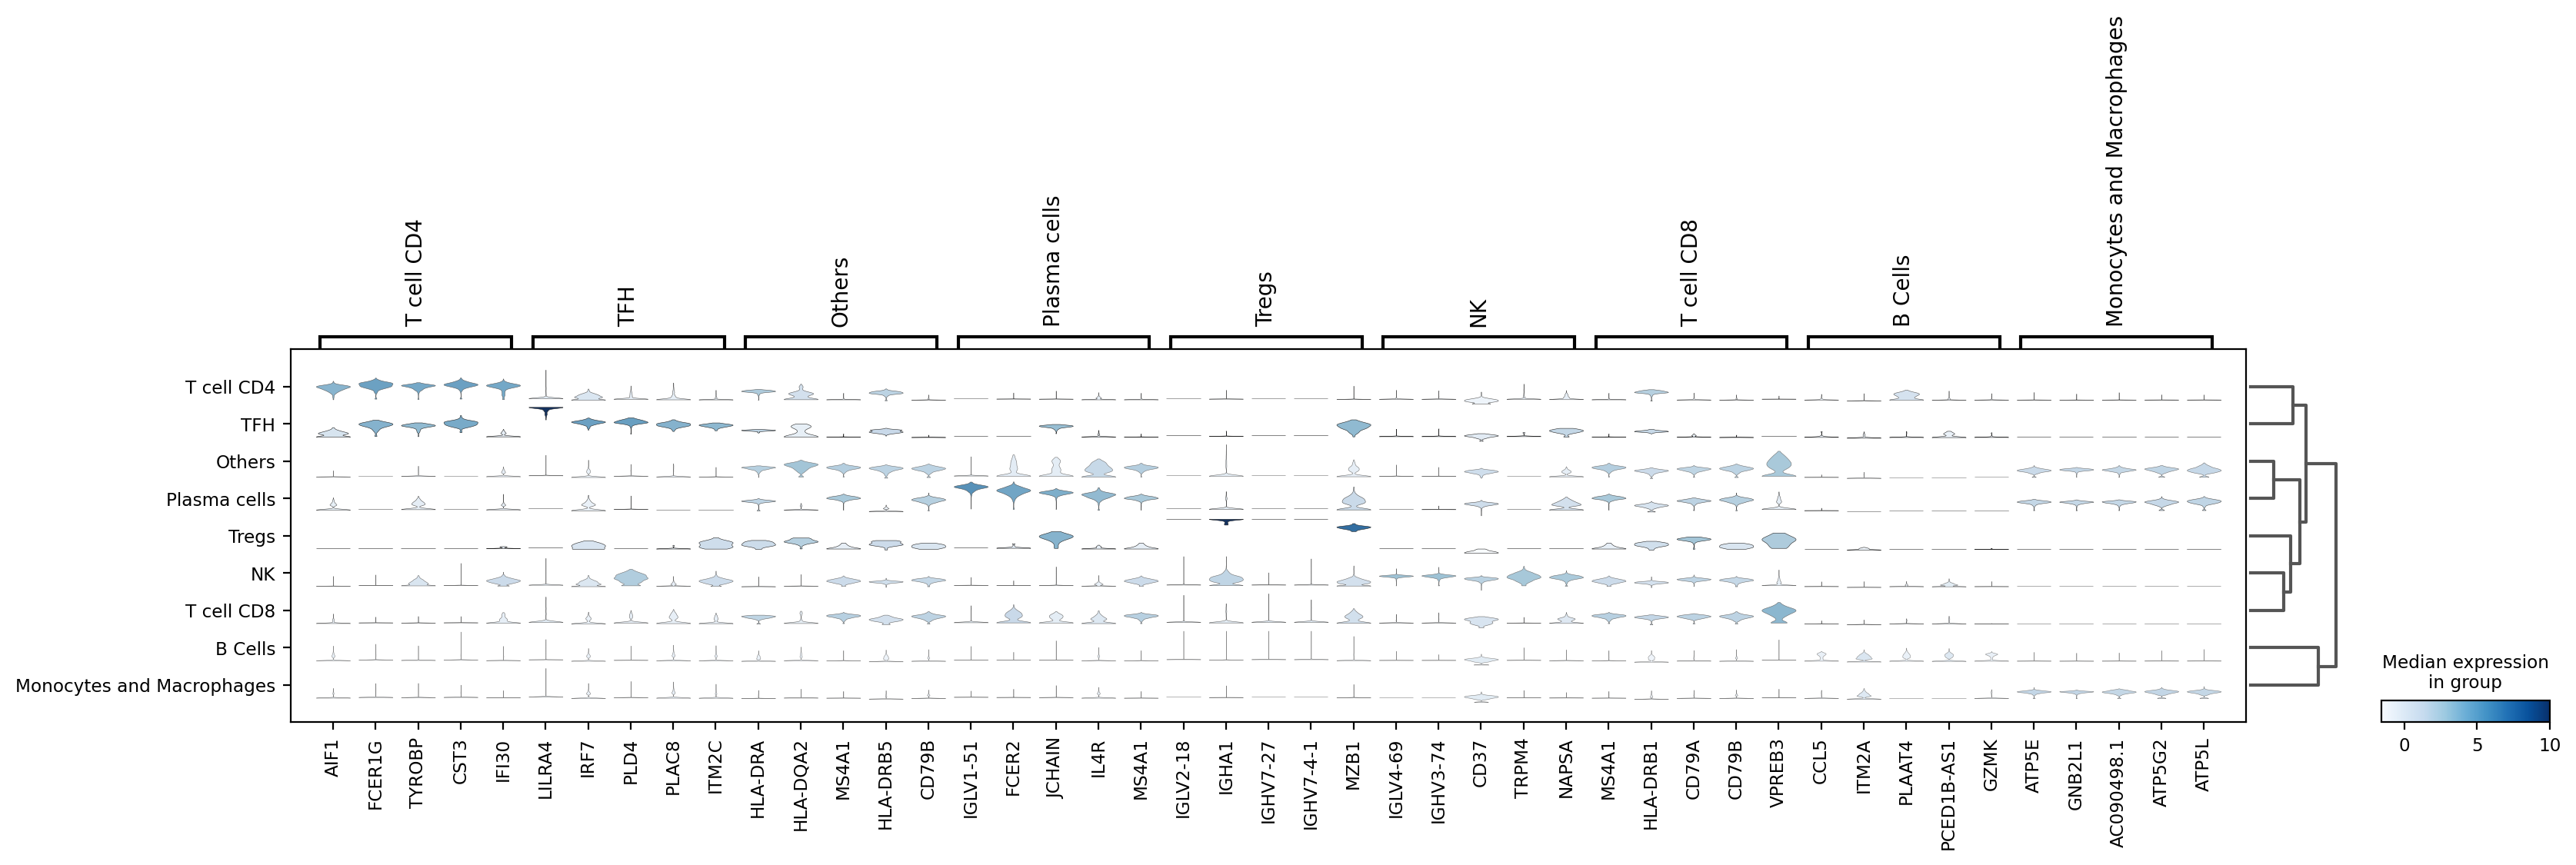

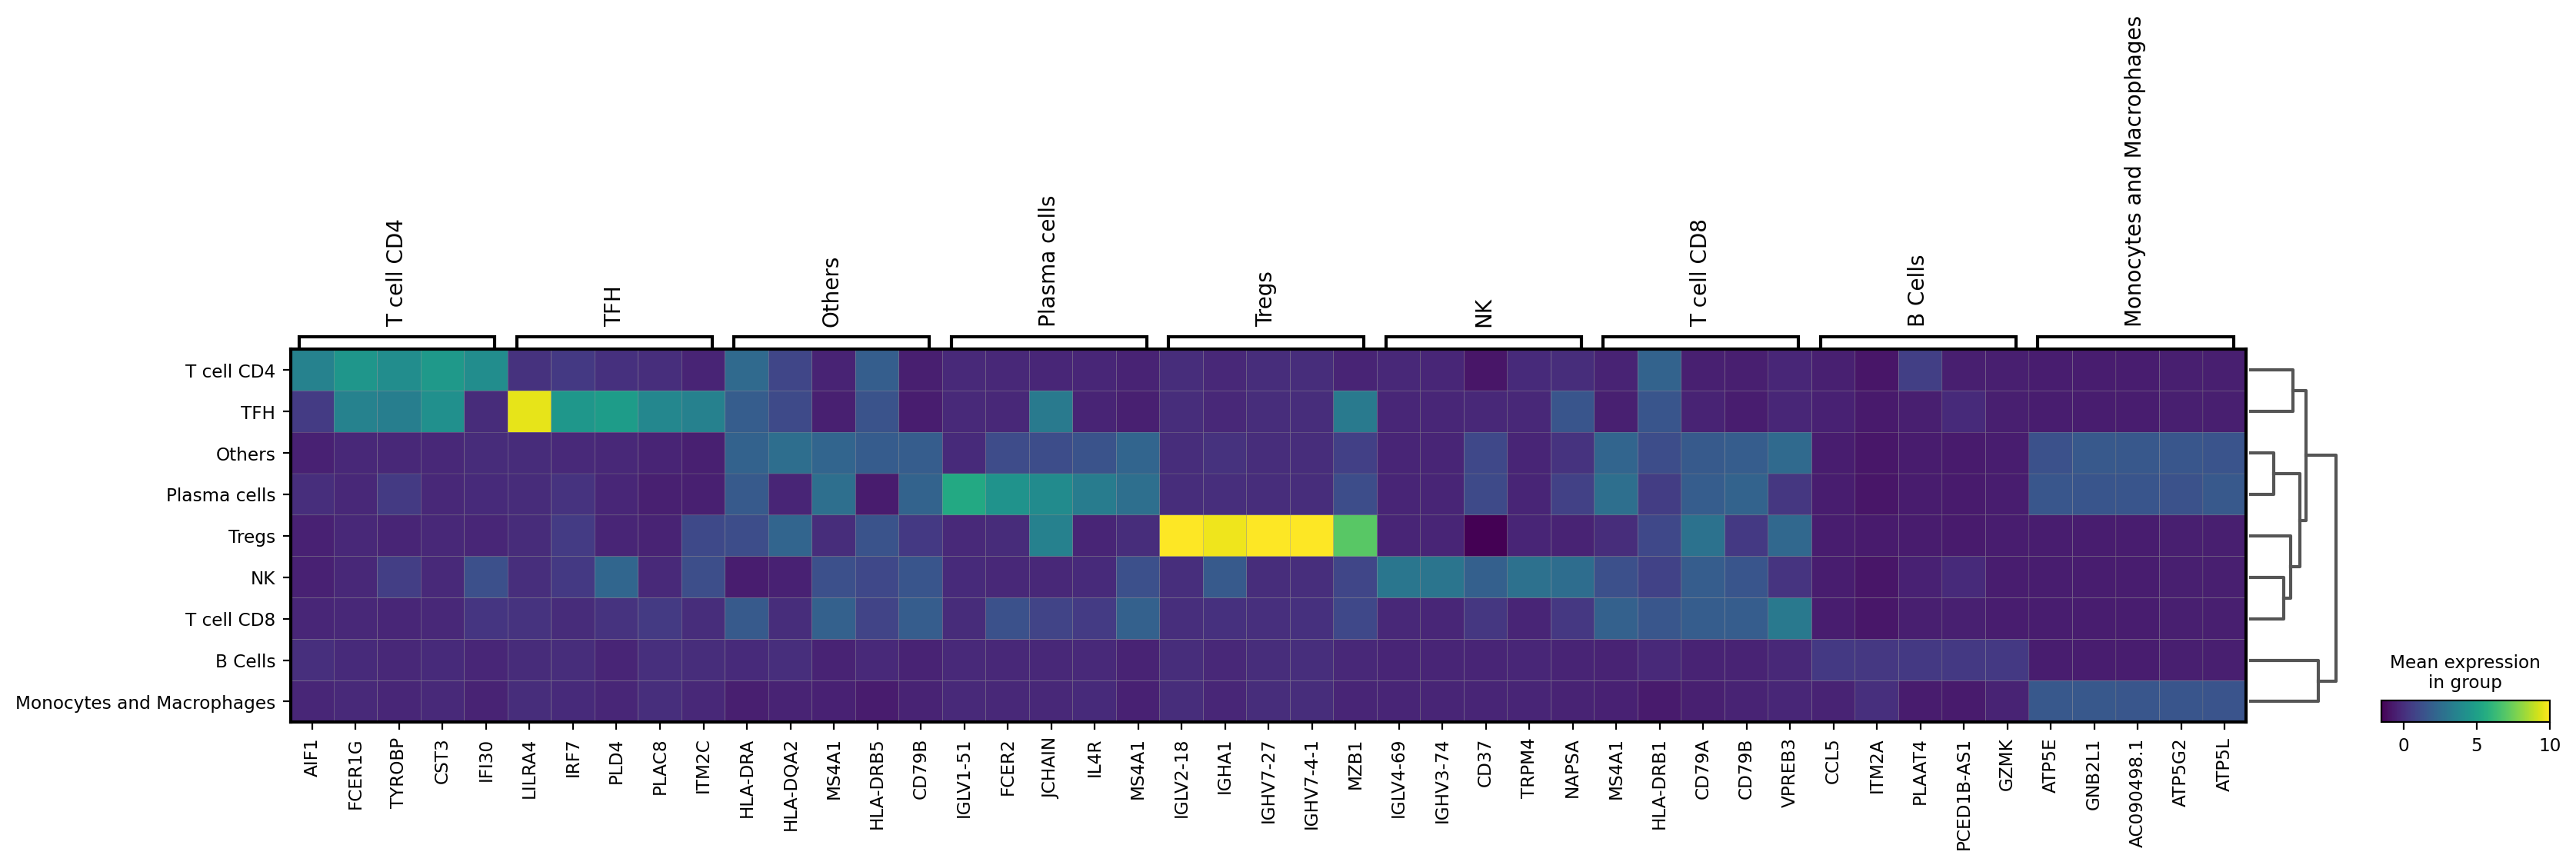

In [44]:
# Visualising differentially expressed genes
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")